In [184]:
import numpy as np 

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.pipeline import Pipeline

from imblearn.pipeline import Pipeline as ImbPipeline

from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC

from sklearn.inspection import permutation_importance

from xgboost import XGBClassifier

from lightgbm import LGBMClassifier

from sklearn.metrics import f1_score, recall_score, make_scorer, roc_auc_score, auc, roc_curve, classification_report, ConfusionMatrixDisplay, precision_recall_curve, average_precision_score

import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

### Data Preparation

#### Data Cleaning 

In [185]:
# Opening the csv file

df = pd.read_csv(r'dataset.csv')

df.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0


In [186]:
# Get Dataset information

df.info(max_cols = None)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [187]:
# Get Data shape 

shape = df.shape 

print(f'The Dataset has {shape[0]} Rows and {shape[1]} Columns')

The Dataset has 1470 Rows and 35 Columns


In [188]:
# Check for Empty cells

df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [189]:
# Check for Null Values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [190]:
# Check for Duplicates

df.duplicated().sum()

np.int64(0)

In [191]:
df['StockOptionLevel'].value_counts()

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64

In [192]:
# Get the Value Count of each Column

df.nunique().sort_values()


EmployeeCount                  1
Over18                         1
StandardHours                  1
Attrition                      2
OverTime                       2
PerformanceRating              2
Gender                         2
BusinessTravel                 3
Department                     3
MaritalStatus                  3
RelationshipSatisfaction       4
StockOptionLevel               4
JobSatisfaction                4
EnvironmentSatisfaction        4
JobInvolvement                 4
WorkLifeBalance                4
Education                      5
JobLevel                       5
EducationField                 6
TrainingTimesLastYear          7
JobRole                        9
NumCompaniesWorked            10
PercentSalaryHike             15
YearsSinceLastPromotion       16
YearsWithCurrManager          18
YearsInCurrentRole            19
DistanceFromHome              29
YearsAtCompany                37
TotalWorkingYears             40
Age                           43
HourlyRate

#### Data Categorization

##### Redundancy Check

In [193]:
# Get redundant columns

redundant_cols = []

for col in df.columns.tolist() :
     if df[col].value_counts().nunique() == 1 :
        redundant_cols.append(col)
        
redundant_cols

['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']

In [194]:
# Remove redundancy

df.drop(columns = redundant_cols, inplace = True)

len(df.columns)


31

##### Columns check

In [195]:
# Check for Numerical Columns 

numerical_cols = df.select_dtypes(include = 'number').columns.tolist()

print(str( len(numerical_cols) ) + ' Numerical Columns \n \n' + str(numerical_cols) )

23 Numerical Columns 
 
['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [196]:
# Check for Categorical Columns

nominal_cols = df.select_dtypes( include = ['object'] ).columns.tolist()

print(str( len(nominal_cols) ) + ' Nominal Categorical Columns \n \n' + str(nominal_cols) )

8 Nominal Categorical Columns 
 
['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']


In [197]:
# Get Ordinal categorical columns

ordinal_cols = df[['Education','EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']].columns.tolist()

print(str( len(ordinal_cols) ) + ' Ordinal Categorical Columns \n \n' + str(ordinal_cols) )

9 Ordinal Categorical Columns 
 
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']


In [198]:
# Encode Overtime and Attrition

df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No' : 0})

df['Attrition'] = df['Attrition'].map({ 'Yes': 1, 'No': 0 })

In [199]:
# Updated dataset size 

shape = df.shape 

print(f'The Dataset now has {shape[0]} Rows and {shape[1]} Columns after removing Redundancies')

The Dataset now has 1470 Rows and 31 Columns after removing Redundancies


In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### Exploratory Data Analysis

In [201]:
def Column_Attr(col):
    col_Attr = pd.crosstab(df[col], df['Attrition'], normalize='index') * 100
    col_Attr.columns = ['No (0)', 'Yes (1)']
    print(f"\n{col} vs Attrition (%): \n")
    print(col_Attr)

#### General Correlation Analysis

In [202]:
# Copy and Encode df 

df_copy = df.copy()

for col in ordinal_cols and numerical_cols and nominal_cols:
        df_copy[col] = LabelEncoder().fit_transform(df_copy[[col]])
        


In [203]:
df_copy.head(3)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,61,2,2,6,2,1,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0


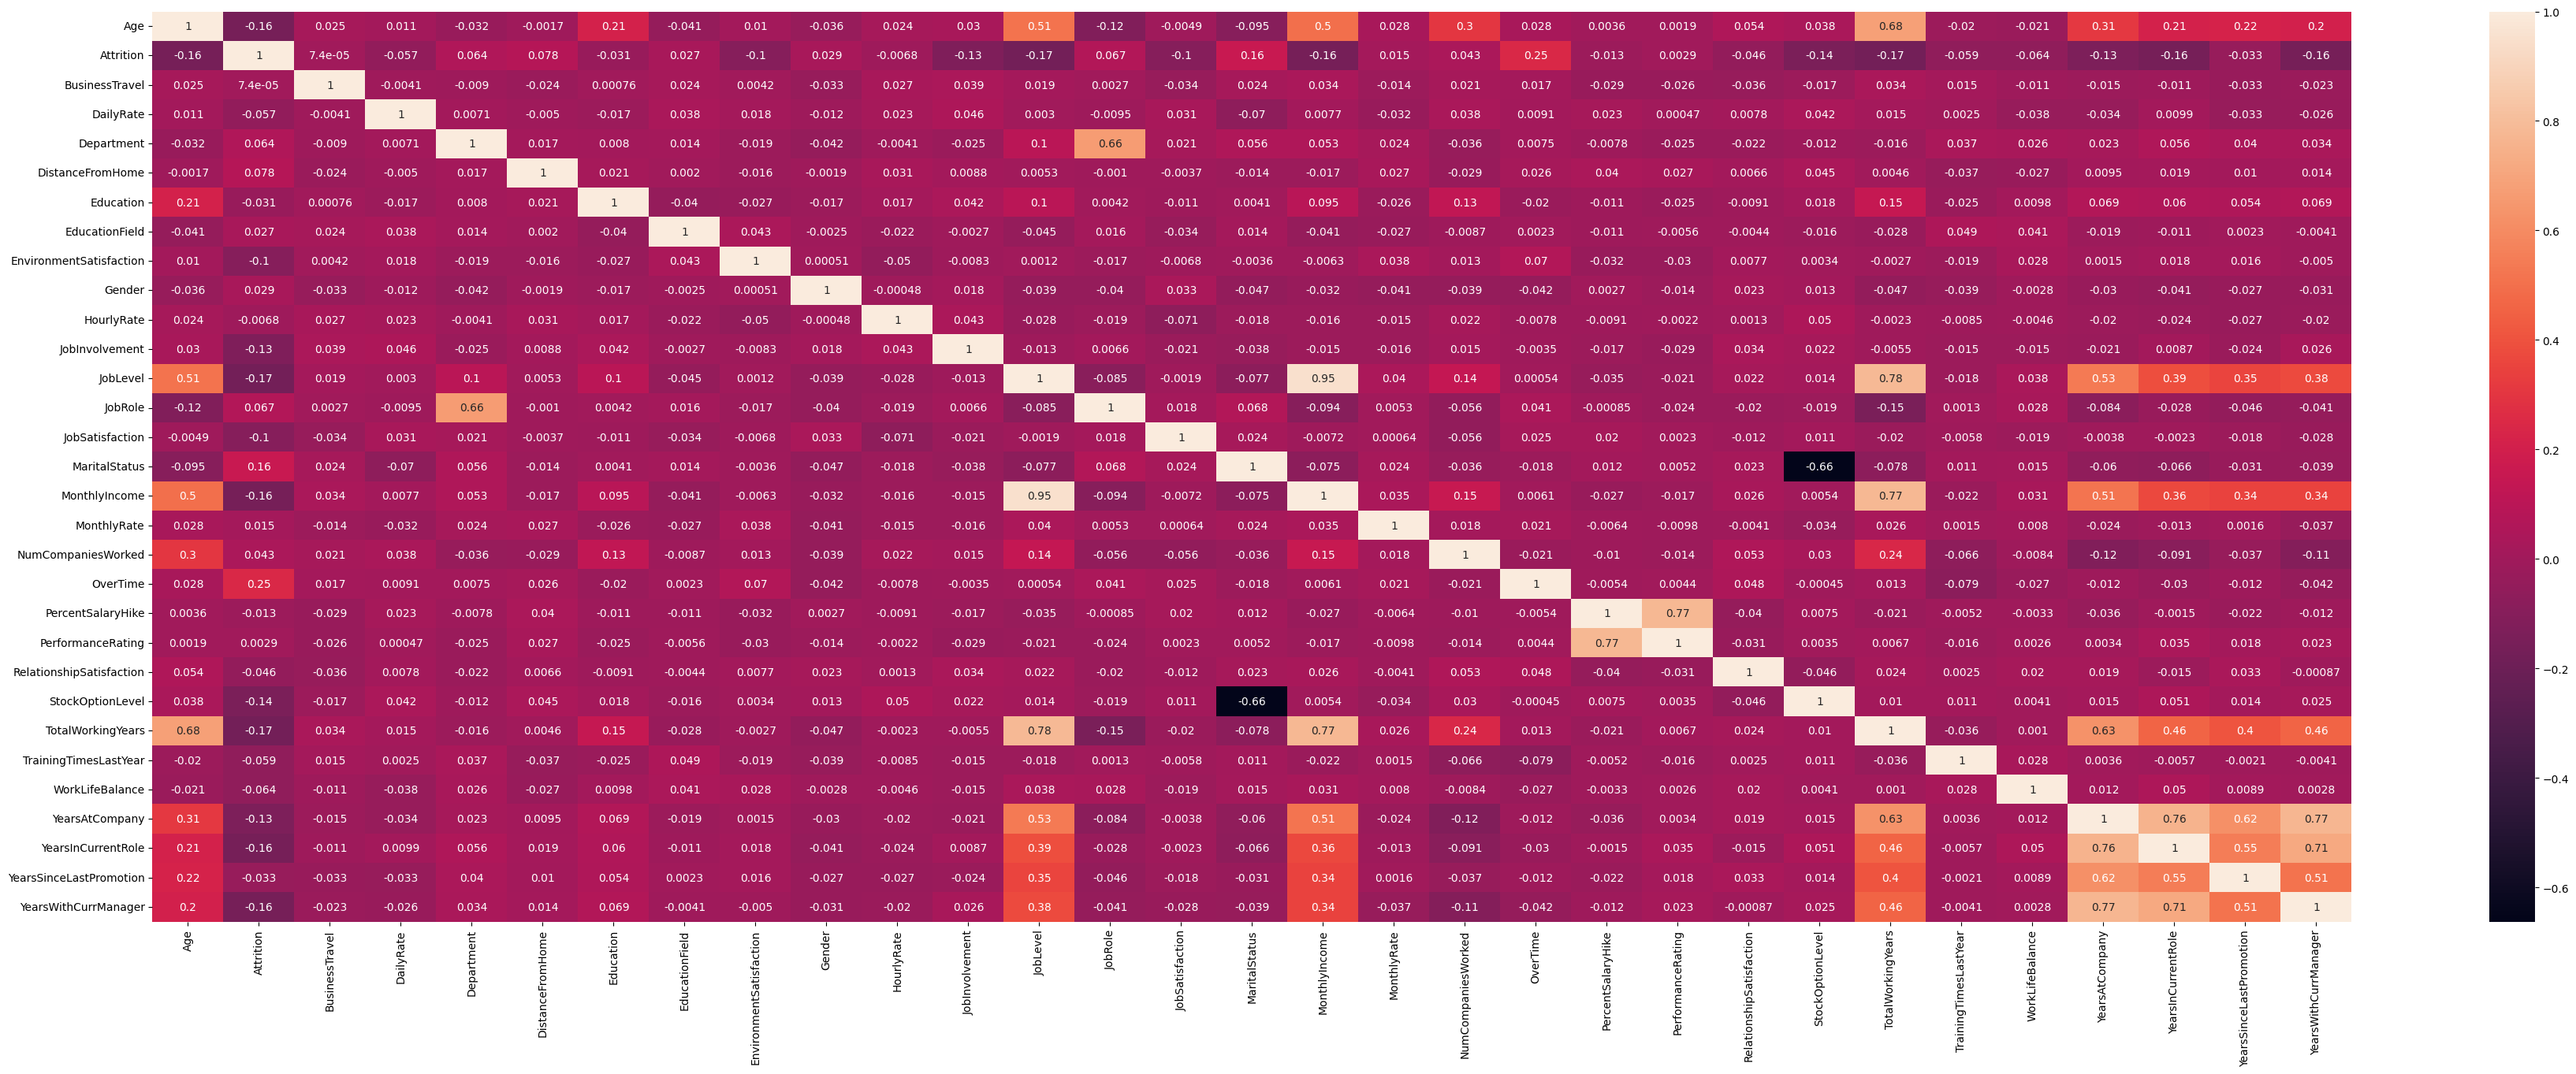

In [204]:
# Plot a correlation chart of df features 

df_encoded_corr = df_copy.corr()

plt.figure(figsize = (45, 15))

sns.heatmap(df_encoded_corr, annot = True)

plt.show()

In [205]:
# List out the correlation of each feature with Attrition

df_corr_list = df_encoded_corr['Attrition'].sort_values(ascending = True ).reset_index()

df_corr_list

,index,Attrition
0,TotalWorkingYears,-0.171063
1,JobLevel,-0.169105
2,YearsInCurrentRole,-0.160545
3,MonthlyIncome,-0.159840
4,Age,-0.159205
5,YearsWithCurrManager,-0.156199
6,StockOptionLevel,-0.137145
7,YearsAtCompany,-0.134392
8,JobInvolvement,-0.130016
9,JobSatisfaction,-0.103481


 From the `Correlation Chart of df`, it is evident that individually, none of the features correlate highly with the target `Attrition` 

#### Age 

In [206]:
df['Age'].value_counts()

Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
28    48
27    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
25    26
24    26
49    24
47    24
55    22
48    19
51    19
53    19
54    18
52    18
22    16
56    14
58    14
23    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
Name: count, dtype: int64

##### Univariate Analysis

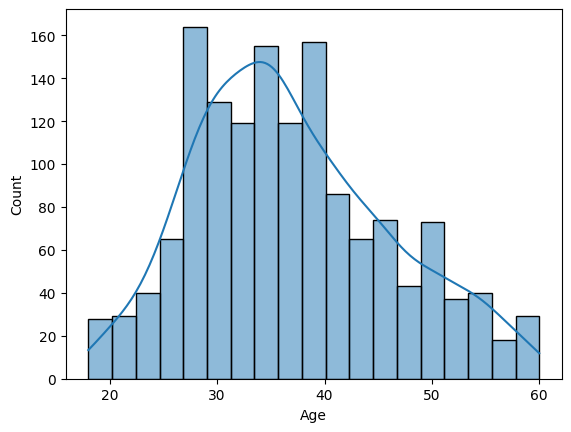

In [207]:
sns.histplot(data = df, x = 'Age', kde=True)


plt.show()

##### Bivariate Analysis

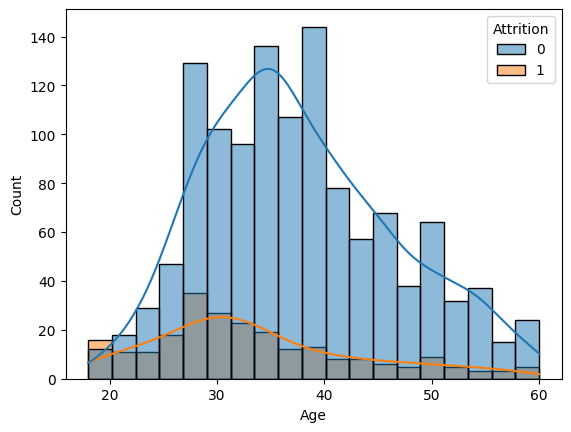

In [208]:
sns.histplot(data = df, x = 'Age', hue ='Attrition', kde=True)

plt.show()

In [209]:
Age_group = pd.cut(df['Age'], bins = [18, 20, 30, 40, 50, 60 ], labels = ['18 - 20', '21 - 30', '31 - 40', '41 - 50', '51 - 60'])

Age_group

0       41 - 50
1       41 - 50
2       31 - 40
3       31 - 40
4       21 - 30
         ...   
1465    31 - 40
1466    31 - 40
1467    21 - 30
1468    41 - 50
1469    31 - 40
Name: Age, Length: 1470, dtype: category
Categories (5, object): ['18 - 20' < '21 - 30' < '31 - 40' < '41 - 50' < '51 - 60']

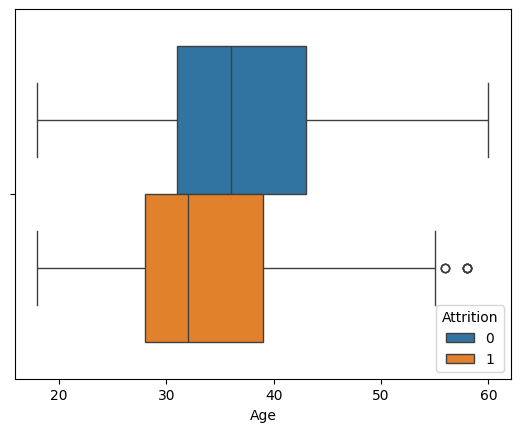

In [210]:
sns.boxplot(data = df, x = 'Age', hue ='Attrition')

plt.show()

> ##### Most employees are between 25–40 years old.
> ##### Insight: 
> ##### Younger employees (<30) have higher attrition; mid-career employees (30–45) are more stable, while attrition slightly rises again approaching retirement due to voluntary exits.

#### Business Travel

In [211]:
Business_Travel = df['BusinessTravel'].value_counts()

Business_Travel.reset_index()

,BusinessTravel,count
0,Travel_Rarely,1043
1,Travel_Frequently,277
2,Non-Travel,150


##### Univariate Analysis : Distribution of Business Travel

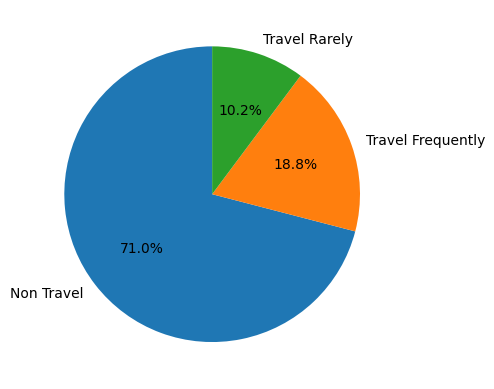

In [212]:
# Distribution of Business Travel categories 
labels = ['Non Travel', 'Travel Frequently', 'Travel Rarely']

plt.pie(Business_Travel, labels = labels, autopct='%1.1f%%', startangle=90)

plt.show()

##### Bivariate Analysis : Business Travel X Attrition


BusinessTravel vs Attrition (%): 

                      No (0)    Yes (1)
BusinessTravel                         
Non-Travel         92.000000   8.000000
Travel_Frequently  75.090253  24.909747
Travel_Rarely      85.043145  14.956855


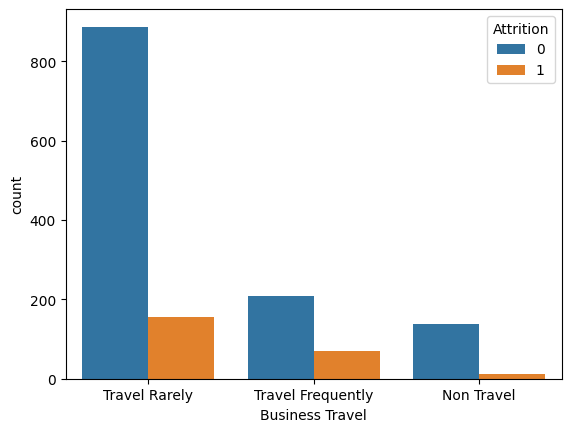

In [213]:
Column_Attr('BusinessTravel')

sns.countplot(data = df, x = 'BusinessTravel' , hue = 'Attrition' )
plt.xlabel('Business Travel')
plt.xticks(ticks=['Non-Travel', 'Travel_Frequently', 'Travel_Rarely'], labels=labels)
plt.show()

Generally, most employees `Rarely Travel`. 
Amongst those that ` Do Not Travel `, the numbers of employees who decided to stay is dominant. 
Amongst the employees that `Travel Frequently` , the attrition rate is higher.

#### Department

##### Univariate Analysis : Distribution of Department

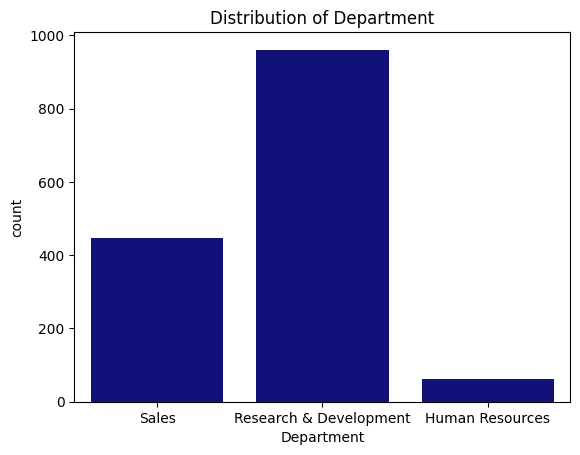


Department Counts: 

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


In [214]:
sns.countplot(data=df, x='Department', color='Darkblue')
plt.title('Distribution of Department')
plt.show()

print("\nDepartment Counts: \n")
print(df['Department'].value_counts())

##### Bivariate Analysis : Department X Attrition.


Department vs Attrition (%): 

                           No (0)    Yes (1)
Department                                  
Human Resources         80.952381  19.047619
Research & Development  86.160250  13.839750
Sales                   79.372197  20.627803


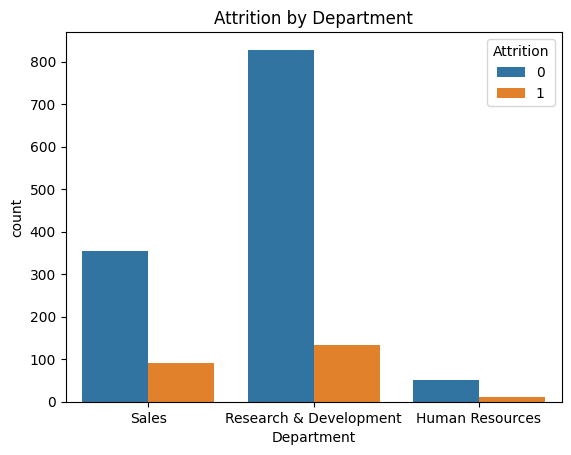

In [215]:
Column_Attr('Department')

sns.countplot(data=df, x='Department', hue='Attrition')
plt.title('Attrition by Department')
plt.show()


#### Education

In [216]:
df['Education'].value_counts()

Education
3    572
4    398
2    282
1    170
5     48
Name: count, dtype: int64

##### Univariate Analysis

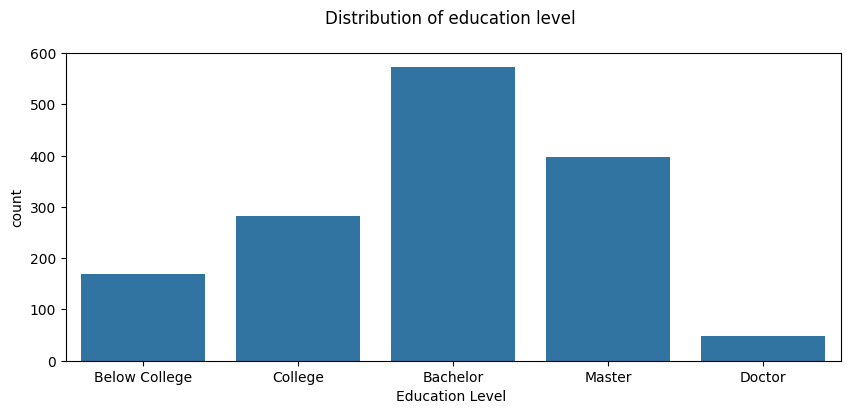

In [217]:
Edu_labels = ['Below College', 'College', 'Bachelor', 'Master', 'Doctor']

plt.figure(figsize = (10, 4))
sns.countplot(x=df['Education'])
plt.title('Distribution of education level \n')
plt.xlabel("Education Level ")
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = Edu_labels)

plt.show()

##### Bivariate Analysis

In [218]:
pd.crosstab(df['Education'], df['Attrition'])

Attrition,0,1
Education,,
1,139,31
2,238,44
3,473,99
4,340,58
5,43,5



Education vs Attrition (%): 

              No (0)    Yes (1)
Education                      
1          81.764706  18.235294
2          84.397163  15.602837
3          82.692308  17.307692
4          85.427136  14.572864
5          89.583333  10.416667


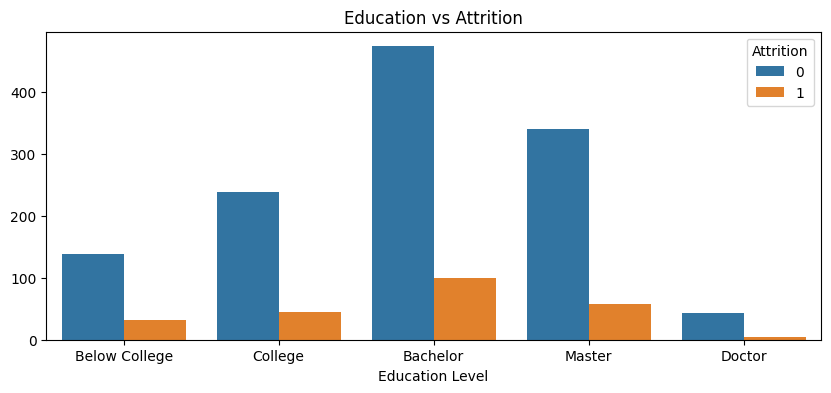

In [219]:
Column_Attr('Education')

plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Education', hue='Attrition')
plt.title("Education vs Attrition")
plt.xlabel("Education Level")
plt.xticks(ticks = [0, 1, 2, 3, 4], labels = Edu_labels)
plt.ylabel("")
plt.show()



#### Job Involvement

In [220]:
df['JobInvolvement'].value_counts()

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64

##### Univariate Analysis

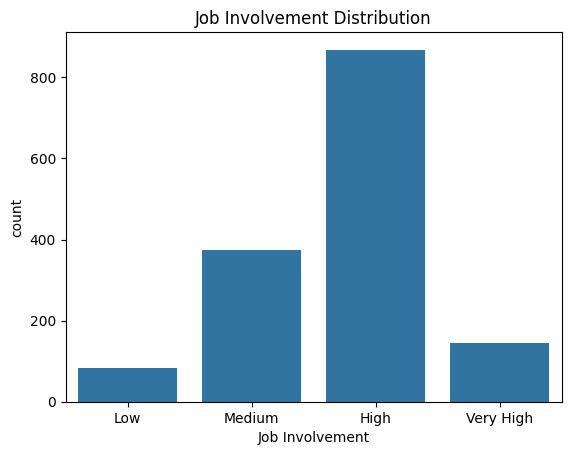

In [221]:
rank_labels = ['Low','Medium','High','Very High']
sns.countplot(data = df, x = 'JobInvolvement')

plt.title('Job Involvement Distribution')
plt.xlabel('Job Involvement')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

##### Bivariate Analysis


JobInvolvement vs Attrition (%): 

                   No (0)    Yes (1)
JobInvolvement                      
1               66.265060  33.734940
2               81.066667  18.933333
3               85.599078  14.400922
4               90.972222   9.027778


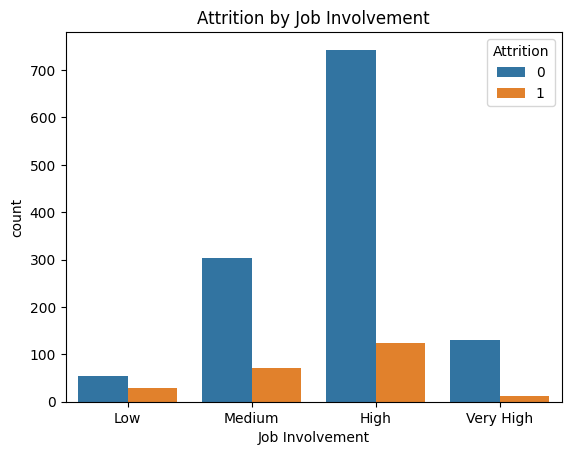

In [222]:
Column_Attr('JobInvolvement')

sns.countplot(data = df, x = 'JobInvolvement', hue = 'Attrition')

plt.title('Attrition by Job Involvement')
plt.xlabel('Job Involvement')
plt.xticks(ticks = [0, 1, 2, 3], labels = rank_labels)
plt.show()

#### Gender

In [223]:
df['Gender'].value_counts()

Gender
Male      882
Female    588
Name: count, dtype: int64

##### Univariate Analysis

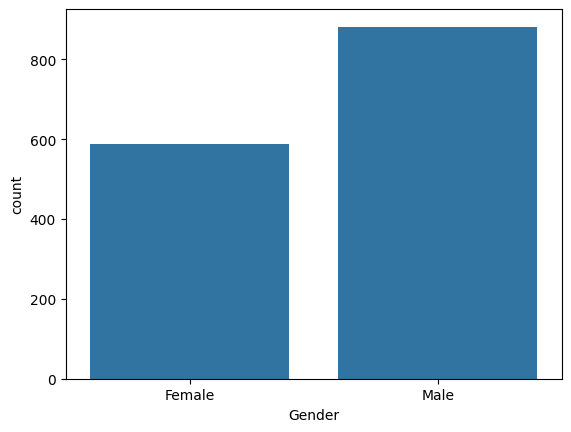

In [224]:
sns.countplot(data = df, x = 'Gender')

plt.show()


Gender vs Attrition (%): 

           No (0)    Yes (1)
Gender                      
Female  85.204082  14.795918
Male    82.993197  17.006803


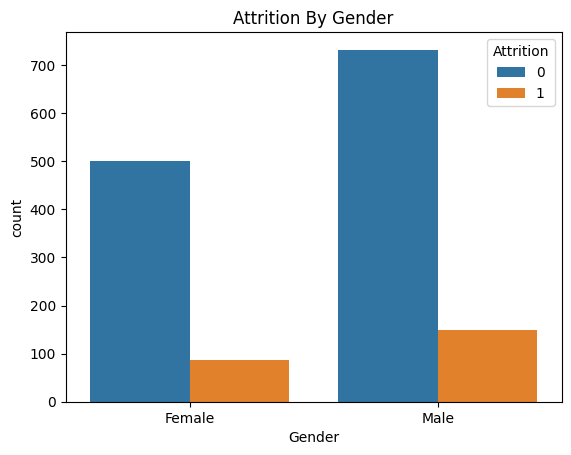

In [225]:
Column_Attr('Gender')

sns.countplot(data = df, x = 'Gender', hue = 'Attrition')
plt.title('Attrition By Gender')
plt.show()

#### Total Working Years

In [226]:
df['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
14     31
2      31
20     30
18     27
19     22
23     22
22     21
24     18
26     14
25     14
28     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

##### Univariate Analysis 

Univariate Analysis: TotalWorkingYears 

count    1470.000000
mean       11.279592
std         7.780782
min         0.000000
25%         6.000000
50%        10.000000
75%        15.000000
max        40.000000
Name: TotalWorkingYears, dtype: float64


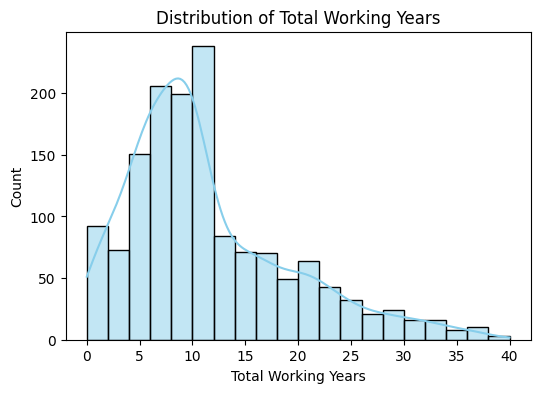

In [227]:
print("Univariate Analysis: TotalWorkingYears \n")
print(df['TotalWorkingYears'].describe())

plt.figure(figsize=(6,4))
sns.histplot(df['TotalWorkingYears'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Total Working Years")
plt.xlabel("Total Working Years")
plt.ylabel("Count")
plt.show()

#####  Bivariate Analysis

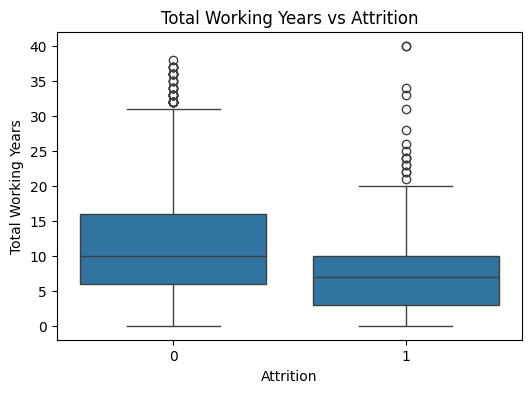

Average Total Working Years by Attrition:
Attrition
0    11.862936
1     8.244726
Name: TotalWorkingYears, dtype: float64
----------------------------------------


In [228]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition', y='TotalWorkingYears', data=df)
plt.title("Total Working Years vs Attrition")
plt.xlabel("Attrition")
plt.ylabel("Total Working Years")
plt.show()


print("Average Total Working Years by Attrition:")
print(df.groupby('Attrition')['TotalWorkingYears'].mean())
print("-"*40)

#### Work-Life Balance

In [229]:
df['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64

#####  Univariate Analysis


Univariate Analysis: WorkLifeBalance 

WorkLifeBalance
1     80
2    344
3    893
4    153
Name: count, dtype: int64


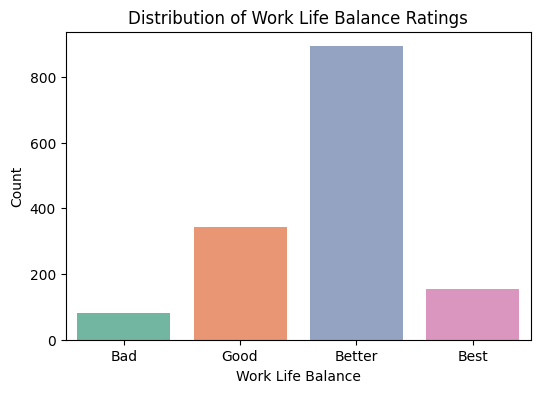

In [230]:
wlb_labels = ['Bad','Good','Better','Best']

print("\nUnivariate Analysis: WorkLifeBalance \n")
print(df['WorkLifeBalance'].value_counts().sort_index())

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', data=df, palette='Set2')
plt.title("Distribution of Work Life Balance Ratings")
plt.xlabel("Work Life Balance")
plt.xticks(ticks=[0,1,2,3], labels = wlb_labels)
plt.ylabel("Count")
plt.show()


##### Bivariate Analysis


WorkLifeBalance vs Attrition (%): 

                    No (0)    Yes (1)
WorkLifeBalance                      
1                68.750000  31.250000
2                83.139535  16.860465
3                85.778275  14.221725
4                82.352941  17.647059


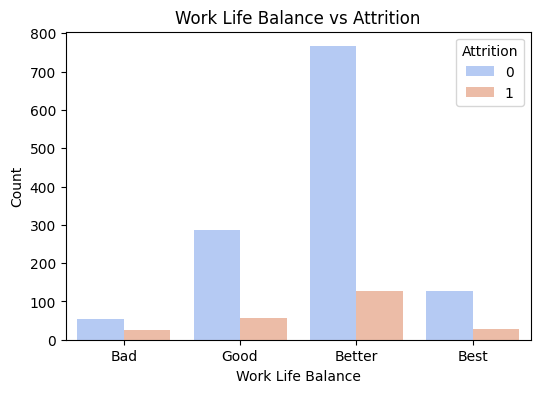

In [231]:
Column_Attr('WorkLifeBalance')

plt.figure(figsize=(6,4))
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='coolwarm')
plt.title("Work Life Balance vs Attrition")
plt.xlabel("Work Life Balance")
plt.xticks(ticks=[0,1,2,3], labels = wlb_labels)
plt.ylabel("Count")
plt.show()


#### Numbers of Companies Worked

##### Univariate Analysis : Distribution

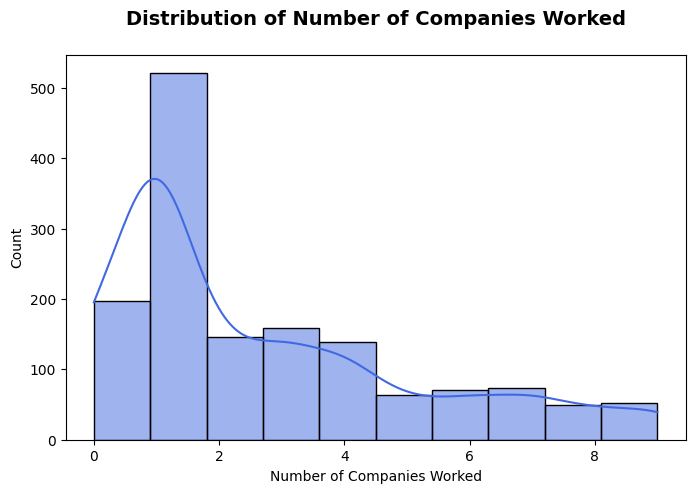

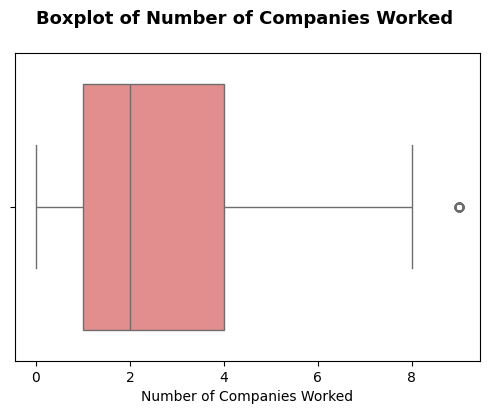

In [232]:
plt.figure(figsize=(8,5))
sns.histplot(df['NumCompaniesWorked'], bins=10, kde=True, color='royalblue')
plt.title('Distribution of Number of Companies Worked\n', fontsize=14, fontweight='bold')
plt.xlabel('Number of Companies Worked')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['NumCompaniesWorked'], color='lightcoral')
plt.title('Boxplot of Number of Companies Worked \n', fontsize=13, fontweight='bold')
plt.xlabel('Number of Companies Worked')
plt.show()

##### Bivariate Analysis


NumCompaniesWorked vs Attrition (%): 

                       No (0)    Yes (1)
NumCompaniesWorked                      
0                   88.324873  11.675127
1                   81.190019  18.809981
2                   89.041096  10.958904
3                   89.937107  10.062893
4                   87.769784  12.230216
5                   74.603175  25.396825
6                   77.142857  22.857143
7                   77.027027  22.972973
8                   87.755102  12.244898
9                   76.923077  23.076923


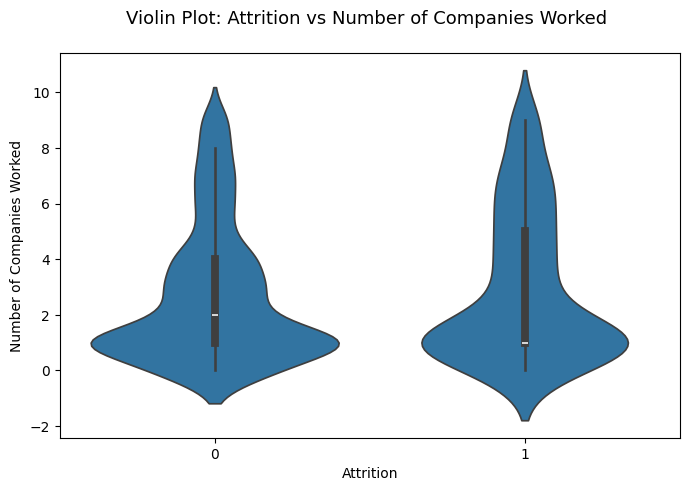

In [233]:
Column_Attr('NumCompaniesWorked')
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='NumCompaniesWorked', data=df)
plt.title('Violin Plot: Attrition vs Number of Companies Worked \n', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Number of Companies Worked')
plt.show()

#### Years In Current Role

##### Univariate Analysis

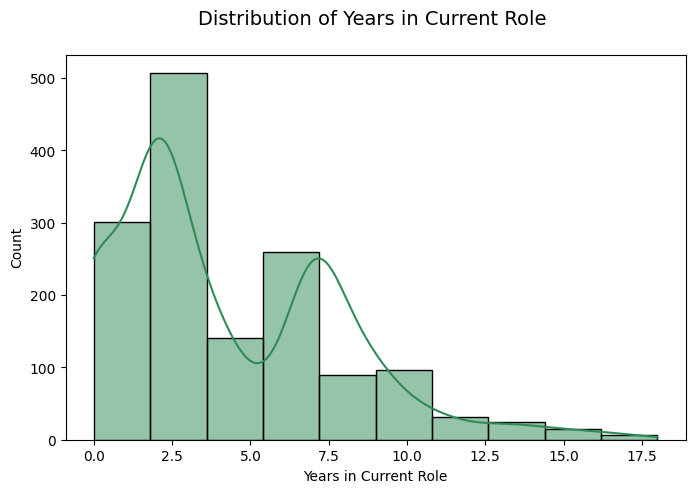

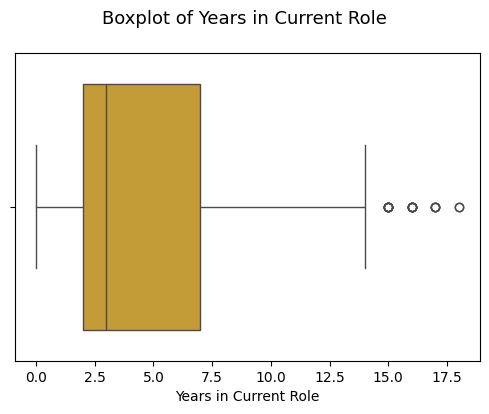

In [234]:
plt.figure(figsize=(8,5))
sns.histplot(df['YearsInCurrentRole'], bins=10, kde=True, color='seagreen')
plt.title('Distribution of Years in Current Role \n', fontsize=14, )
plt.xlabel('Years in Current Role')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsInCurrentRole'], color='goldenrod')
plt.title('Boxplot of Years in Current Role \n', fontsize=13, )
plt.xlabel('Years in Current Role')
plt.show()

##### Bivariate Analysis

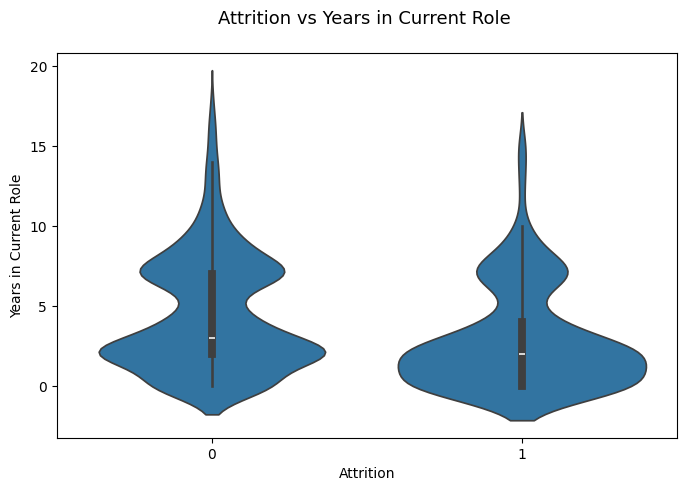

In [235]:
plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsInCurrentRole', data=df)
plt.title('Attrition vs Years in Current Role \n', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Years in Current Role')
plt.show()

#### Years Since Last Promotion

##### Univariate Analysis : Distribution

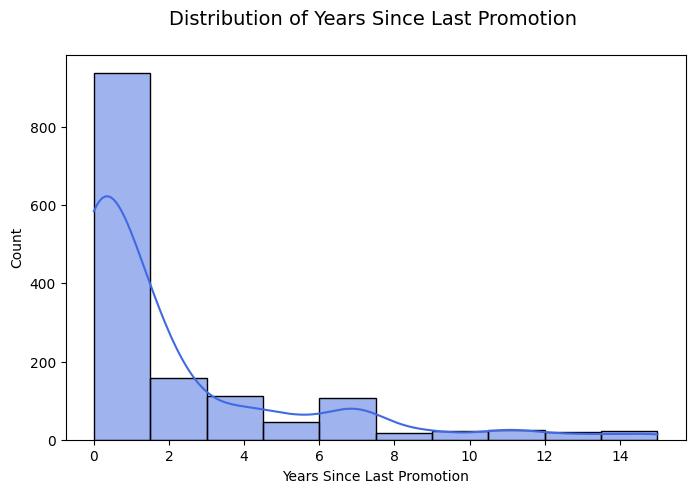

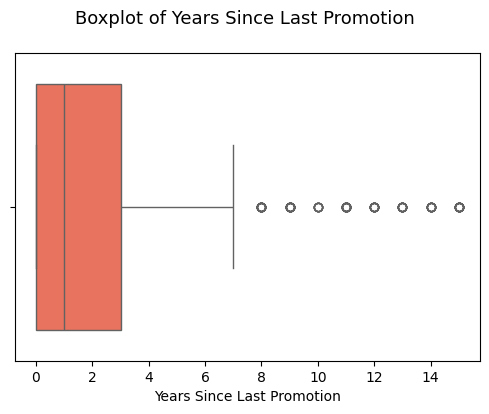

In [236]:
plt.figure(figsize=(8,5))
sns.histplot(df['YearsSinceLastPromotion'], bins=10, kde=True, color='RoyalBlue')
plt.title('Distribution of Years Since Last Promotion \n', fontsize=14)
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x=df['YearsSinceLastPromotion'], color='tomato')
plt.title('Boxplot of Years Since Last Promotion \n', fontsize=13)
plt.xlabel('Years Since Last Promotion')
plt.show()

##### Bivariate Analysis : Years since last promotion X Attrition


YearsSinceLastPromotion vs Attrition (%): 

                             No (0)    Yes (1)
YearsSinceLastPromotion                       
0                         81.067126  18.932874
1                         86.274510  13.725490
2                         83.018868  16.981132
3                         82.692308  17.307692
4                         91.803279   8.196721
5                         95.555556   4.444444
6                         81.250000  18.750000
7                         78.947368  21.052632
8                        100.000000   0.000000
9                         76.470588  23.529412
10                        83.333333  16.666667
11                        91.666667   8.333333
12                       100.000000   0.000000
13                        80.000000  20.000000
14                        88.888889  11.111111
15                        76.923077  23.076923


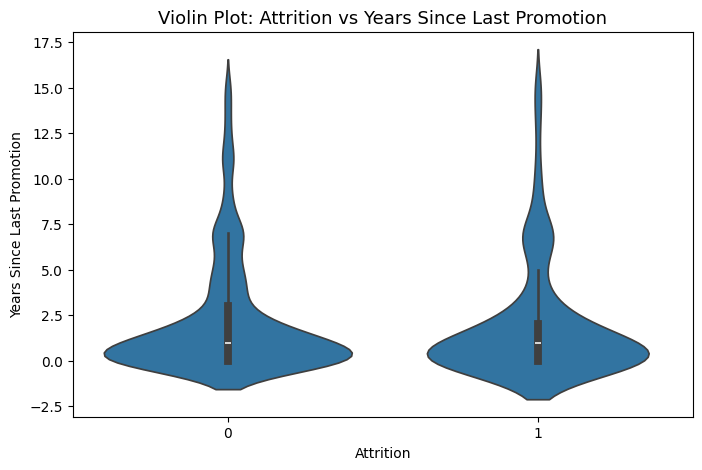

In [237]:
Column_Attr('YearsSinceLastPromotion')

plt.figure(figsize=(8,5))
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=df)
plt.title('Violin Plot: Attrition vs Years Since Last Promotion', fontsize=13)
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()

### Multivariate Analysis

In [238]:
def VC_table(cols):
    table = df[cols].nunique().reset_index()
    table.columns = ['Column','Value Counts']
    
    print('Value Counts for each column of the combination')
    return table

1. Attrition By Job Satisfaction and Job Level

In [239]:
VC_table(['JobSatisfaction','JobLevel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobSatisfaction,4
1,JobLevel,5
2,Attrition,2


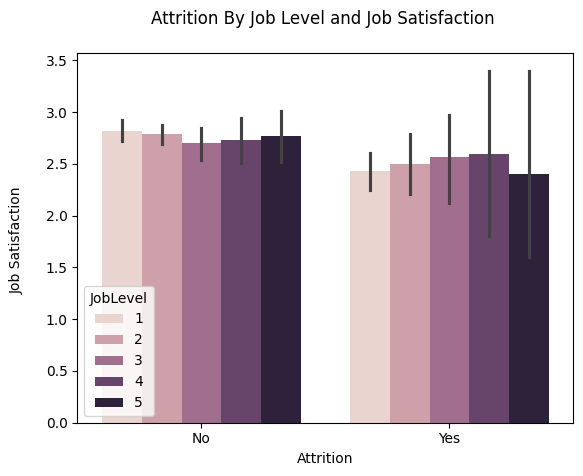

In [240]:
sns.barplot(y='JobSatisfaction', x='Attrition', hue='JobLevel', data=df)

plt.title('Attrition By Job Level and Job Satisfaction \n')
plt.ylabel('Job Satisfaction \n')
plt.xticks(ticks = [0, 1], labels = ['No', 'Yes'])
plt.show()

2. Attrition By Overtime and Job Satisfaction

In [241]:
VC_table(['OverTime','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,OverTime,2
1,JobSatisfaction,4
2,Attrition,2


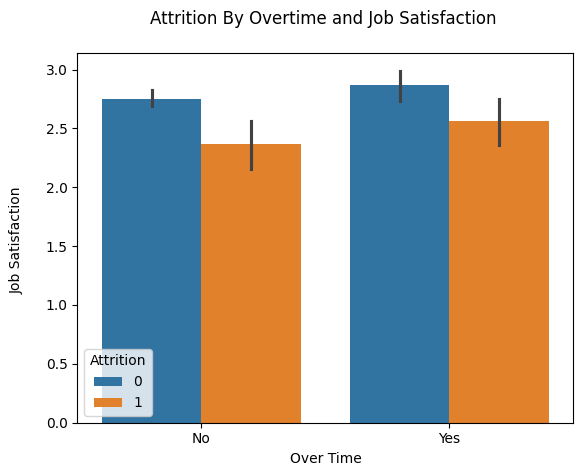

In [242]:
sns.barplot(data = df, x = 'OverTime', y ='JobSatisfaction', hue = 'Attrition')

plt.title('Attrition By Overtime and Job Satisfaction \n')
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Over Time')

plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()


3. Attrition By Work-Life Balance and Job Satisfaction

In [243]:
VC_table(['WorkLifeBalance','JobSatisfaction','MaritalStatus','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,WorkLifeBalance,4
1,JobSatisfaction,4
2,MaritalStatus,3
3,Attrition,2


In [244]:
df[['WorkLifeBalance','JobSatisfaction', 'MaritalStatus', 'Attrition']].head(5)

,WorkLifeBalance,JobSatisfaction,MaritalStatus,Attrition
0,1,4,Single,1
1,3,2,Married,0
2,3,3,Single,1
3,3,3,Married,0
4,3,2,Married,0


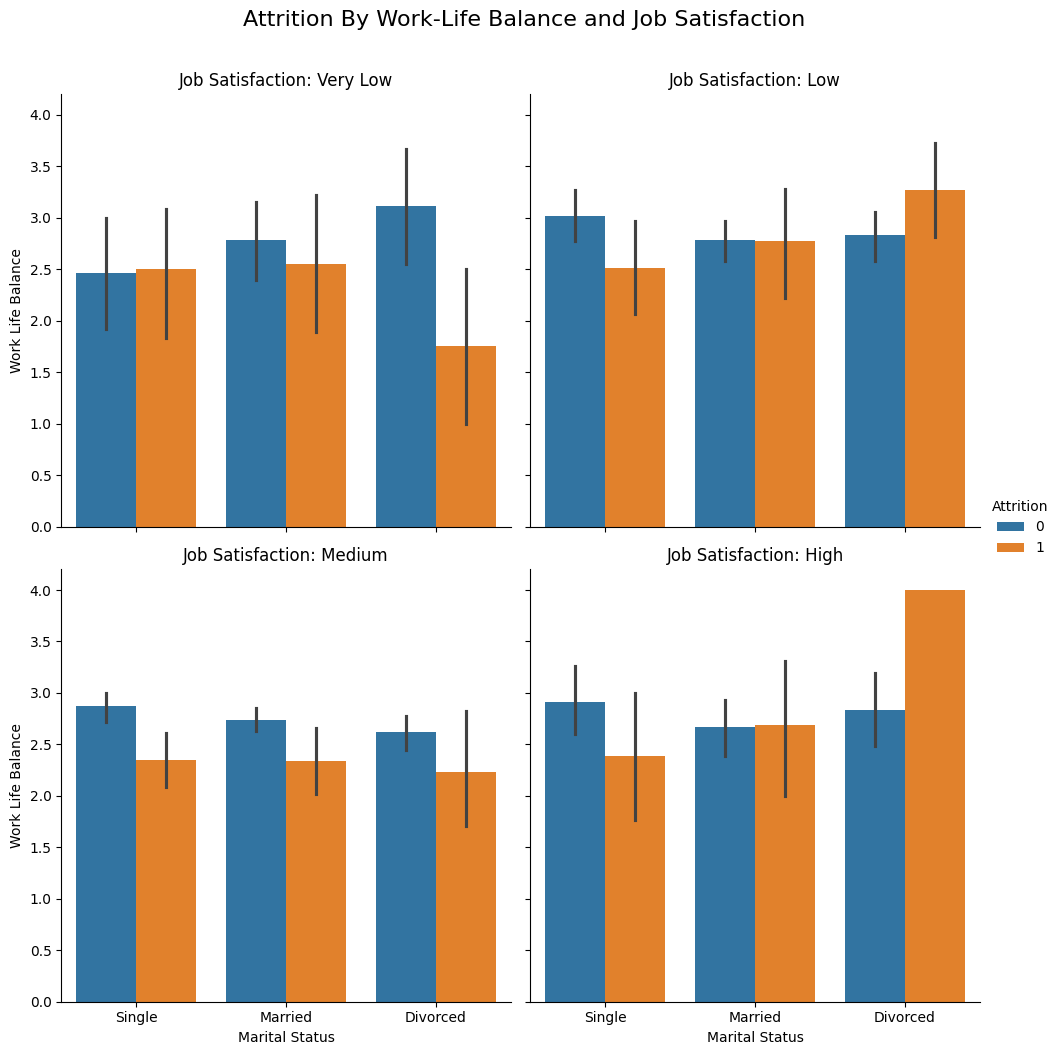

In [245]:
g = sns.catplot(data = df,kind = 'bar' , y = 'JobSatisfaction', col = 'WorkLifeBalance', x = 'MaritalStatus', hue ='Attrition', col_wrap=2)

satisfaction_labels = {
    1: "Very Low",
    2: "Low",
    3: "Medium",
    4: "High"
}

for ax, title in zip(g.axes.flat, g.col_names):
    ax.set_title(f"Job Satisfaction: {satisfaction_labels.get(title, title)}")

g.set_xlabels('Marital Status')
g.set_ylabels('Work Life Balance')
g.fig.suptitle("Attrition By Work-Life Balance and Job Satisfaction", fontsize=16, y=1.05)
plt.show()


4. Attrition By Years In current Role and Years Since Last promotion

In [246]:
VC_table(['YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,YearsInCurrentRole,19
1,YearsSinceLastPromotion,16
2,YearsWithCurrManager,18
3,Attrition,2


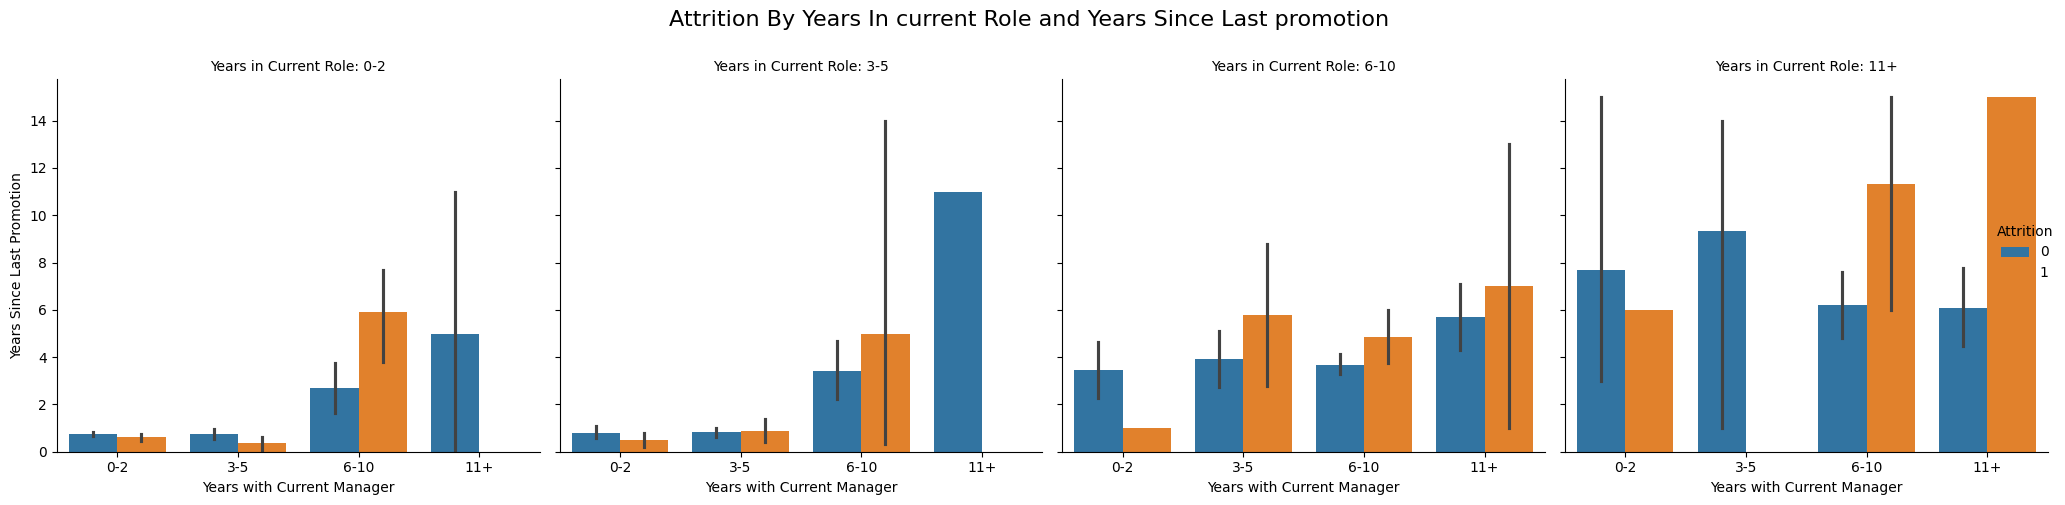

In [247]:
year_cols = df[['YearsInCurrentRole', 'YearsWithCurrManager']].columns.tolist()

test = {}

bin_edges = [0, 2, 5, 10, 20] 
bin_labels = ['0-2', '3-5', '6-10', '11+']

for col in year_cols:
    test[f'{col}_bin'] = pd.cut(
        df[col],
        bins=bin_edges,
        labels=bin_labels,
        include_lowest=True,
        right=True
    )
    

    
g = sns.catplot(data = test, kind = 'bar', x = 'YearsWithCurrManager_bin', y = df['YearsSinceLastPromotion'] , hue = df['Attrition'], col = 'YearsInCurrentRole_bin')

g.set_axis_labels("Years with Current Manager", "Years Since Last Promotion")

g.set_titles("Years in Current Role: {col_name}")

g.fig.suptitle('Attrition By Years In current Role and Years Since Last promotion', fontsize=16, y=1)
plt.tight_layout()
plt.show()

5. Average Monthly Income by Education and Attrition

In [248]:
test = pd.pivot_table(df, index = 'Education', columns= 'Attrition', values = 'MonthlyIncome', aggfunc='mean')

test

Attrition,0,1
Education,,
1,5926.129496,4360.161290
2,6586.058824,4282.545455
3,6882.919662,4770.242424
4,7087.814706,5335.155172
5,8559.906977,5850.200000


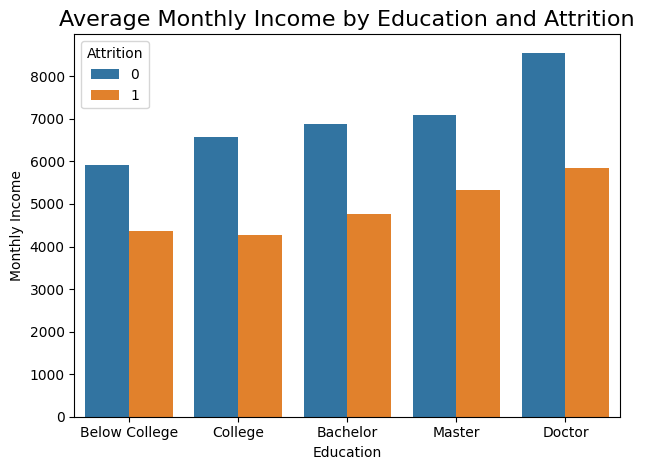

In [249]:
test_melted = test.reset_index().melt(id_vars='Education', value_name='MonthlyIncome', var_name='Attrition')

sns.barplot(data=test_melted, x='Education', y='MonthlyIncome', hue='Attrition')
plt.title('Average Monthly Income by Education and Attrition', fontsize=16)

plt.xticks(ticks=[0,1,2,3,4], labels = Edu_labels)
plt.ylabel('Monthly Income')
plt.tight_layout()
plt.show()



6. Attrition By Performance Rating and Job Involvement

In [250]:
VC_table(['PerformanceRating','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,PerformanceRating,2
1,JobInvolvement,4
2,Attrition,2


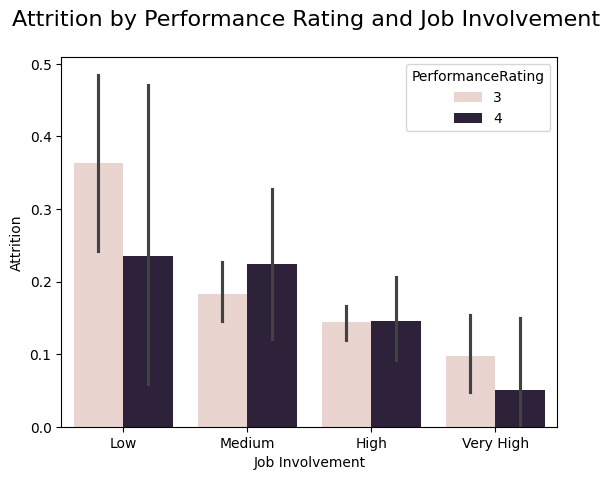

In [251]:
sns.barplot(data = df, x = 'JobInvolvement', y = 'Attrition', hue = 'PerformanceRating')

plt.title('Attrition by Performance Rating and Job Involvement \n',fontsize=16)
plt.xlabel('Job Involvement')
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.show()

7. Attrition by Job Satisfaction and Job Involvement

In [252]:
VC_table(['JobInvolvement','JobSatisfaction','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,JobInvolvement,4
1,JobSatisfaction,4
2,Attrition,2


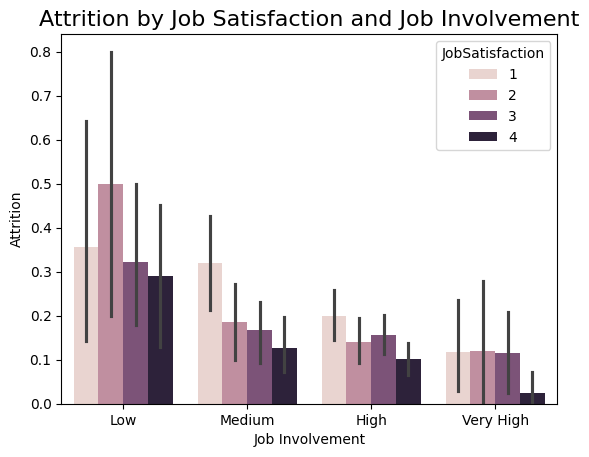

In [253]:
sns.barplot(data = df, x = 'JobInvolvement', y = 'Attrition', hue = 'JobSatisfaction')

plt.title('Attrition by Job Satisfaction and Job Involvement', fontsize=16)
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.xlabel('Job Involvement')
plt.show()

8. Attrition By Numbers of companies worked and Total Working Years

In [254]:
VC_table(['NumCompaniesWorked','TotalWorkingYears','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,NumCompaniesWorked,10
1,TotalWorkingYears,40
2,Attrition,2


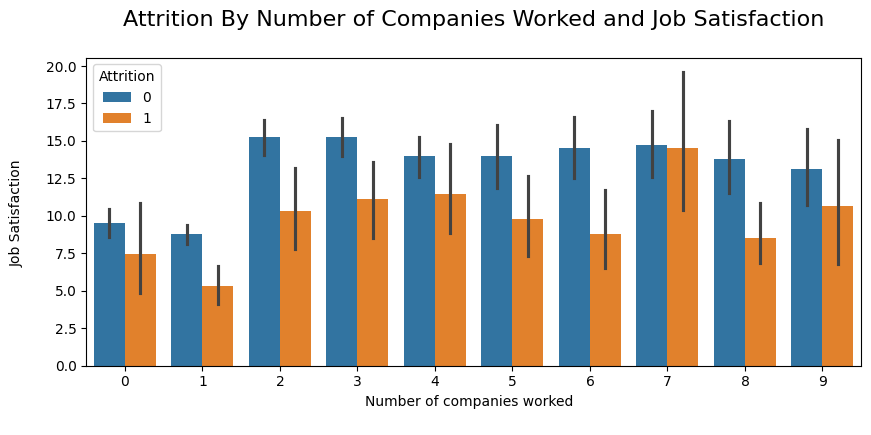

In [255]:
plt.figure(figsize = (10, 4))
sns.barplot(y='TotalWorkingYears', x='NumCompaniesWorked', hue='Attrition', data=df)

plt.title('Attrition By Number of Companies Worked and Job Satisfaction\n', fontsize=16)
plt.ylabel('Job Satisfaction \n')
plt.xlabel('Number of companies worked  \n')

plt.show()

9. Attrition by Environment Satisfaction and job Involvement 

In [256]:
VC_table(['EnvironmentSatisfaction','JobInvolvement','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,EnvironmentSatisfaction,4
1,JobInvolvement,4
2,Attrition,2


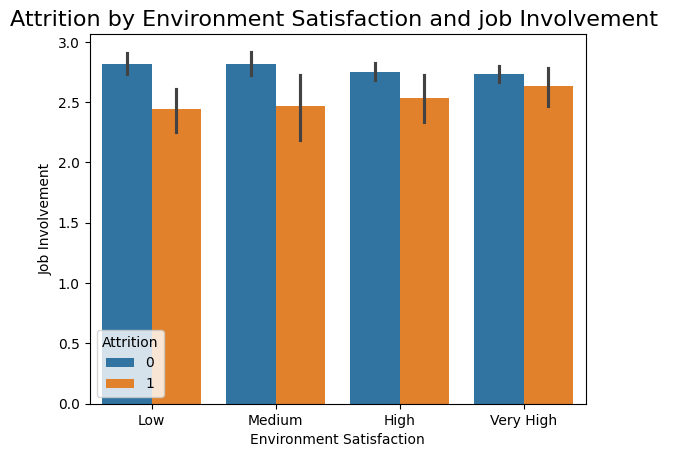

In [257]:
sns.barplot(data = df, x = 'EnvironmentSatisfaction', y = 'JobInvolvement', hue = 'Attrition')

plt.title('Attrition by Environment Satisfaction and job Involvement ', fontsize=16)
plt.xlabel('Environment Satisfaction')
plt.xticks(ticks=[0,1,2,3], labels = rank_labels)
plt.ylabel('Job Involvement')

plt.show()

10. Attrition by Business Travel and Marital Status

In [258]:
VC_table(['MaritalStatus','BusinessTravel','Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,MaritalStatus,3
1,BusinessTravel,3
2,Attrition,2


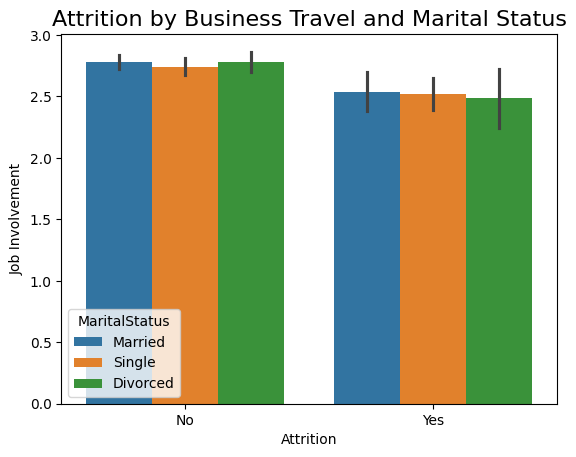

In [259]:
sns.barplot(data = df, x = 'Attrition', y = 'JobInvolvement', hue = 'MaritalStatus')

plt.title('Attrition by Business Travel and Marital Status', fontsize=16)
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.ylabel('Job Involvement')
plt.show()

11. Attrition by Department and Job Satisfaction

In [260]:
VC_table(['Department', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,Department,3
1,JobSatisfaction,4
2,Attrition,2


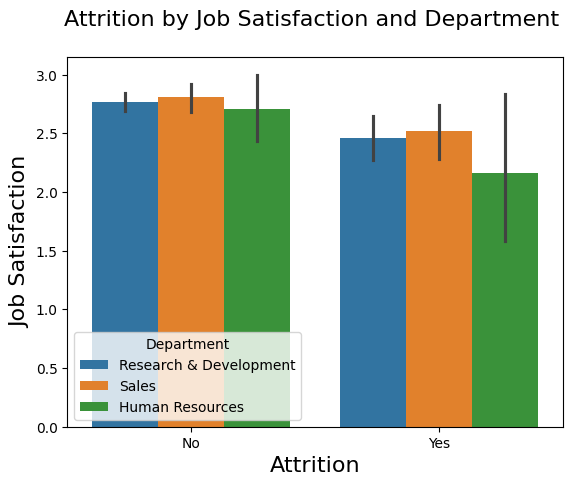

In [261]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'Department')

plt.title('Attrition by Job Satisfaction and Department \n', fontsize=16)
plt.ylabel('Job Satisfaction', fontsize=16)
plt.xlabel('Attrition', fontsize=16)
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.show()

12. Attrition by Training Time Last Year and Job Level

In [262]:
VC_table(['TrainingTimesLastYear', 'JobLevel', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,TrainingTimesLastYear,7
1,JobLevel,5
2,Attrition,2


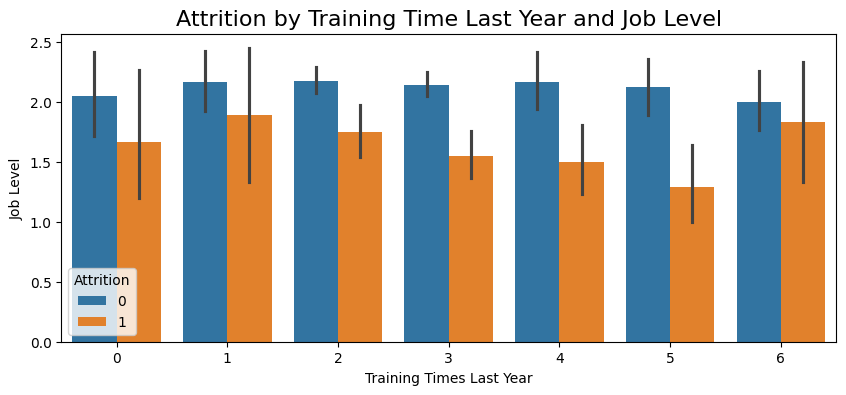

In [263]:
plt.figure(figsize = (10, 4))

sns.barplot(data = df, x = 'TrainingTimesLastYear', y = 'JobLevel', hue = 'Attrition')

plt.title('Attrition by Training Time Last Year and Job Level', fontsize = 16)
plt.xlabel('Training Times Last Year')
plt.ylabel('Job Level')
plt.show()

13. Attrition by Distance From Home and Job Satisfaction

In [264]:
VC_table(['DistanceFromHome', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,DistanceFromHome,29
1,JobSatisfaction,4
2,Attrition,2


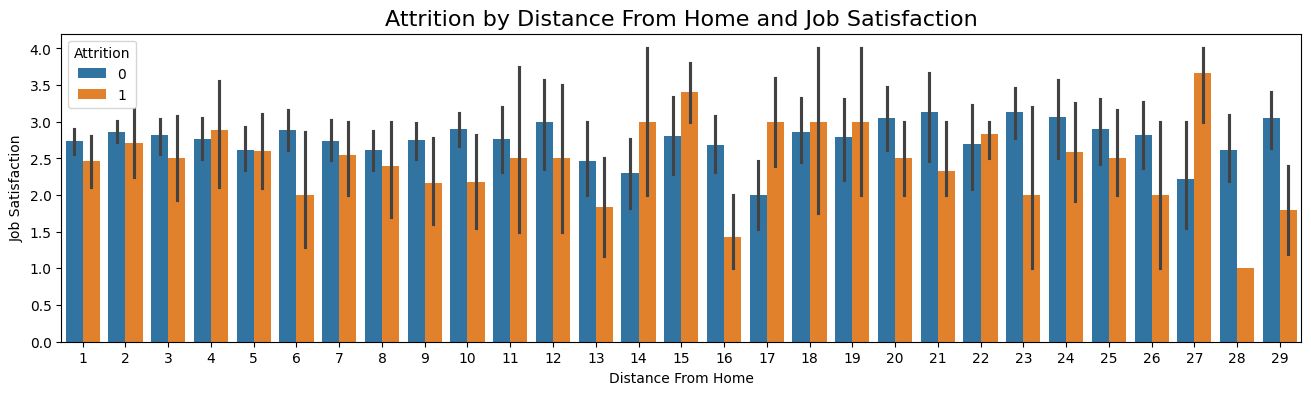

In [265]:
plt.figure(figsize = (16, 4))

sns.barplot(data = df, x = 'DistanceFromHome', y = 'JobSatisfaction', hue = 'Attrition')
plt.title('Attrition by Distance From Home and Job Satisfaction', fontsize = 16)
plt.xlabel('Distance From Home')
plt.ylabel('Job Satisfaction')
plt.show()

14. Attrition by Relationship Satisfaction and Job Satisfaction

In [266]:
VC_table(['RelationshipSatisfaction', 'JobSatisfaction', 'Attrition'])

Value Counts for each column of the combination


,Column,Value Counts
0,RelationshipSatisfaction,4
1,JobSatisfaction,4
2,Attrition,2


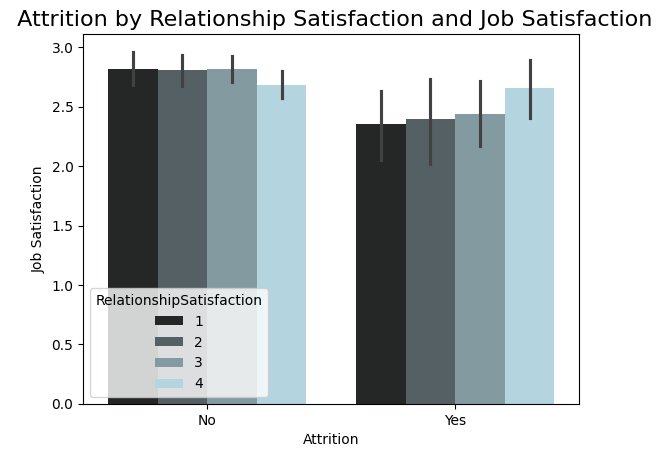

In [267]:
sns.barplot(data = df, x = 'Attrition', y = 'JobSatisfaction', hue = 'RelationshipSatisfaction', color='lightblue')

plt.title(' Attrition by Relationship Satisfaction and Job Satisfaction', fontsize = 16)
plt.ylabel('Job Satisfaction')
plt.xticks(ticks=[0,1], labels = ['No','Yes'])
plt.show()

### Feature Engineering

#### Feature Addition

In [268]:
df.shape

(1470, 31)

In [269]:
# Add Tenure Feature 

df['Loyalty'] = round((df['YearsAtCompany'] / df['TotalWorkingYears']), 2)

df['Loyalty'].fillna(0, inplace=True)

df['Loyalty'].isnull().sum()

np.int64(0)

In [270]:
df.head(2)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Loyalty
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0.75
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1.00


In [271]:
print(df.shape)

(1470, 32)


#### Feature Selection

##### Define and Encode x

In [272]:
# Define x

x = df.drop( columns = ['Attrition','DailyRate', 'EducationField', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'StockOptionLevel','PercentSalaryHike'])

x.shape

(1470, 24)

In [273]:
# Get the categorical columns of variable x

x_numerical_cols = x.select_dtypes( include = 'number').columns.tolist()

x_non_ordinal_cols = x.select_dtypes(include = ['object']).columns.tolist()

print(str( len(x_non_ordinal_cols) ) + ' Categorical Columns of Independent Variable (x)  \n \n' + str(x_non_ordinal_cols) )

5 Categorical Columns of Independent Variable (x)  
 
['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus']


In [274]:
# x columns 

x_ordinal_cols = [col for col in ordinal_cols if col in x.columns and col not in x_non_ordinal_cols]

print(f'Ordinal Columns of x : \n \n{x_ordinal_cols}')

print(f'\n Non-Ordinal / Nominal Columns of x : {x_non_ordinal_cols}')

Ordinal Columns of x : 
 
['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'PerformanceRating', 'RelationshipSatisfaction', 'WorkLifeBalance']

 Non-Ordinal / Nominal Columns of x : ['BusinessTravel', 'Department', 'Gender', 'JobRole', 'MaritalStatus']


In [275]:
x_numerical_cols = [col for col in x_numerical_cols if col not in x_ordinal_cols]

print(x_numerical_cols)


['Age', 'DistanceFromHome', 'NumCompaniesWorked', 'OverTime', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Loyalty']


In [276]:
# Define and encode y (Dependent Variable)

y = df['Attrition']

y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

### Modeling

In [277]:
# Split 

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [278]:
# Preprocessing 

preprocessors = ColumnTransformer(
    
    transformers = [
        
        ('One_hot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), x_non_ordinal_cols),
        ('Ord_encoder', OrdinalEncoder(), x_ordinal_cols),
        ('num', 'passthrough', x_numerical_cols)
        
    ],
    
    remainder = 'drop'
)

In [279]:
cv = StratifiedKFold(n_splits = 4, shuffle = True, random_state=42)

In [280]:
# F1_score, PR score, Auc_score

def model_metric(pipeline, metric):
    for i in range(len(metric)):
        scores = cross_val_score(pipeline, x_train, y_train, cv = cv, scoring = metric[i], error_score='raise')
        pipeline.fit(x_train, y_train)
        
        print(f'{metric[i].upper()} : {scores.mean()} \n')
        
        print(f'{metric[i].upper()} (std) : {scores.std()} \n')
        
        print(classification_report(pipeline.predict(x_test), y_test))

    # Confusion Matrix chart
    
    ConfusionMatrixDisplay.from_predictions(y_test, pipeline.predict(x_test))
    plt.show()
    
    # ROC Curve
    
    probs = pipeline.predict_proba(x_test)
    preds = probs[:, 1] 
    fpr, tpr, thresholds = roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], linestyle='--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.show()
    
    # Precision-Recall Curve
    
    precision, recall, thresholds = precision_recall_curve(y_test, preds)
    avg_precision = average_precision_score(y_test, preds)
    plt.plot(recall, precision, label=f'AP = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()
    plt.show()
    


In [281]:
# Feature Importance

def feature_importance_linear(pipeline):
    importance = pipeline.named_steps['lr'].coef_[0]
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df

def feature_importance_tree(pipeline):
    importance = pipeline.named_steps['model'].feature_importances_
    onehot_encoder = pipeline.named_steps['Preprocessors'].named_transformers_['One_hot']
    onehot_names = onehot_encoder.get_feature_names_out(x_non_ordinal_cols)
    
    ordinal_names = x_ordinal_cols
    numerical_names = x_numerical_cols

    all_feature_names = list(onehot_names) + ordinal_names + numerical_names
    
    coef_df = pd.DataFrame({
        'feature': all_feature_names,
        'coefficient': importance
    }).sort_values(by='coefficient', key=abs, ascending=False)
    
    return coef_df


In [282]:
# grid search parameters function

def grid_search(grid):
    fit = grid.fit(x_train, y_train)
    y_pred_lr = grid.predict(x_test)
    return fit, print("Best params:", grid.best_params_), print("Best F1:", grid.best_score_), print(classification_report(y_test, y_pred_lr))
    


#### Logistic Regressor

F1 : 0.5255243234695289 

F1 (std) : 0.06474144696226618 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.38      0.62      0.47        29

    accuracy                           0.86       294
   macro avg       0.67      0.76      0.70       294
weighted avg       0.90      0.86      0.88       294

PRECISION : 0.7534169613910994 

PRECISION (std) : 0.07132172077235593 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.38      0.62      0.47        29

    accuracy                           0.86       294
   macro avg       0.67      0.76      0.70       294
weighted avg       0.90      0.86      0.88       294

RECALL : 0.41500443262411346 

RECALL (std) : 0.08845188686238621 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       265
           1       0.38      0.62    

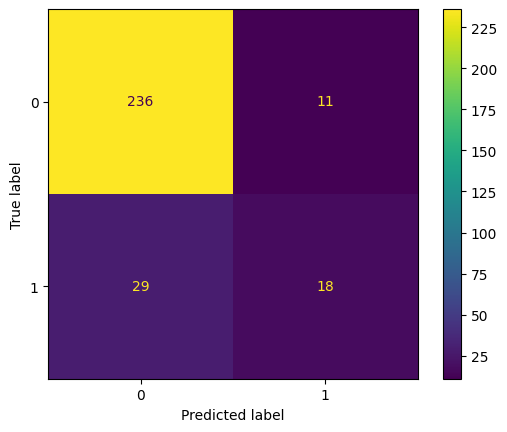

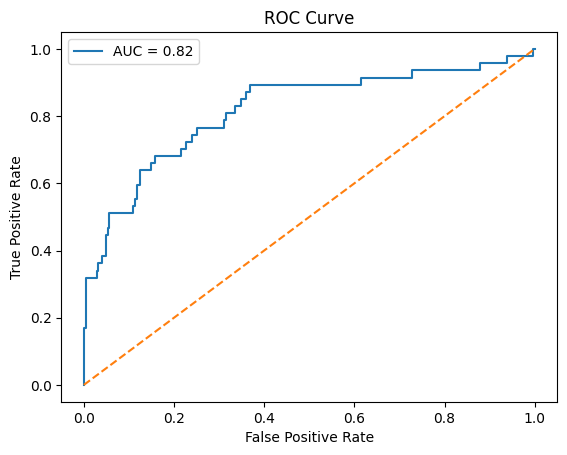

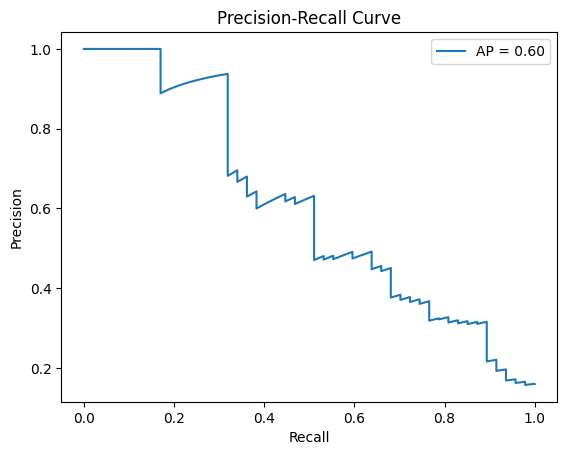

,feature,coefficient
31,OverTime,0.856419
36,YearsSinceLastPromotion,0.593773
30,NumCompaniesWorked,0.536229
13,JobRole_Research Director,-0.514738
21,EnvironmentSatisfaction,-0.478143
37,YearsWithCurrManager,-0.423837
24,JobSatisfaction,-0.423488
28,Age,-0.417608
35,YearsInCurrentRole,-0.396970
29,DistanceFromHome,0.376280


In [283]:
# Baseline Model without SMOTE()

Pipe_lr = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression())
    
])

model_metric(Pipe_lr, ['f1','precision', 'recall', 'roc_auc'])

feature_importance_linear(Pipe_lr)

F1 : 0.4859766396686223 

F1 (std) : 0.020666890522827965 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       218
           1       0.62      0.38      0.47        76

    accuracy                           0.78       294
   macro avg       0.71      0.65      0.67       294
weighted avg       0.76      0.78      0.76       294

PRECISION : 0.3764241861793261 

PRECISION (std) : 0.012462618918592318 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       220
           1       0.64      0.41      0.50        74

    accuracy                           0.79       294
   macro avg       0.73      0.66      0.68       294
weighted avg       0.78      0.79      0.78       294

RECALL : 0.7046764184397163 

RECALL (std) : 0.0604304824836966 

              precision    recall  f1-score   support

           0       0.82      0.92      0.87       220
           1       0.64      0.41    

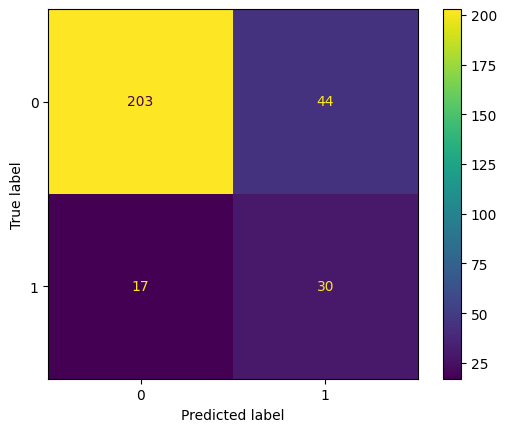

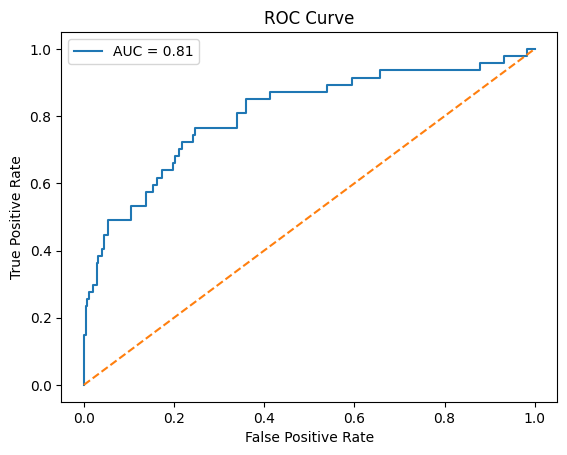

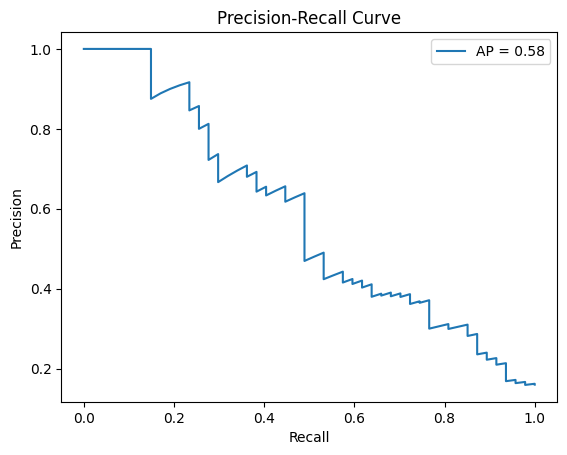

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
Best params: {'lr__C': 0.1, 'lr__class_weight': None, 'lr__max_iter': 400, 'lr__penalty': 'l2', 'lr__solver': 'sag'}
Best F1: 0.5194706850769121
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       247
           1       0.38      0.64      0.48        47

    accuracy                           0.78       294
   macro avg       0.65      0.72      0.67       294
weighted avg       0.84      0.78      0.80       294



,feature,coefficient
31,OverTime,0.909743
36,YearsSinceLastPromotion,0.748281
13,JobRole_Research Director,-0.699632
30,NumCompaniesWorked,0.628536
37,YearsWithCurrManager,-0.577919
0,BusinessTravel_Non-Travel,-0.545386
23,JobLevel,0.501268
8,JobRole_Healthcare Representative,-0.461068
16,JobRole_Sales Representative,0.454587
21,EnvironmentSatisfaction,-0.429909


In [288]:
Pipe_lr_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(random_state=42))
    
])

param_grid_lr = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] ,
    'lr__max_iter' : [100, 200, 300, 400, 500, 600],
}

scoring = {
    'f1_pos': make_scorer(f1_score, pos_label=1),
    'recall_pos': make_scorer(recall_score, pos_label=1)
}

grid_lr = GridSearchCV(
    estimator=Pipe_lr_balanced,
    param_grid=param_grid_lr,
    cv=cv,
    scoring=scoring,
    refit='f1_pos',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_lr_balanced, ['f1','precision', 'recall', 'roc_auc'])

lr_fit = grid_search(grid_lr)

lr_best_params = grid_lr.best_params_

lr_clean_params = {k.split('__')[1]: v for k, v in lr_best_params.items()}

feature_importance_linear(Pipe_lr_balanced)



F1 : 0.49468027342034104 

F1 (std) : 0.015309817592394536 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       214
           1       0.66      0.39      0.49        80

    accuracy                           0.78       294
   macro avg       0.73      0.66      0.67       294
weighted avg       0.76      0.78      0.76       294

PRECISION : 0.401668105862584 

PRECISION (std) : 0.031674279462248066 

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       211
           1       0.66      0.37      0.48        83

    accuracy                           0.77       294
   macro avg       0.72      0.65      0.66       294
weighted avg       0.75      0.77      0.75       294

RECALL : 0.6941489361702128 

RECALL (std) : 0.06994843771979233 

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       213
           1       0.66      0.38   

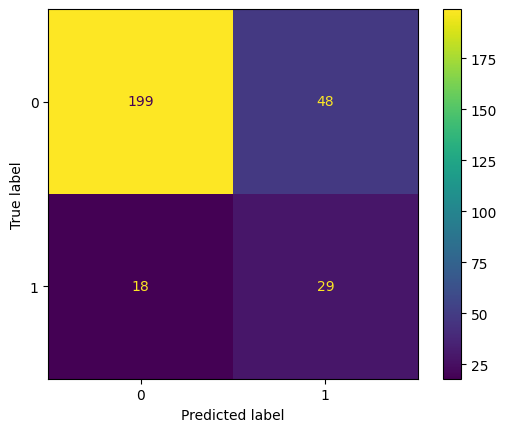

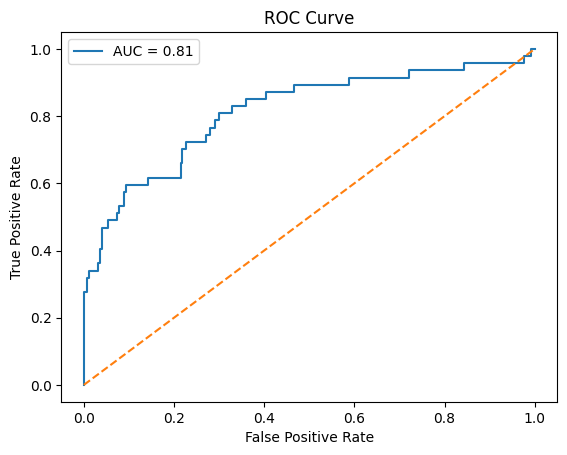

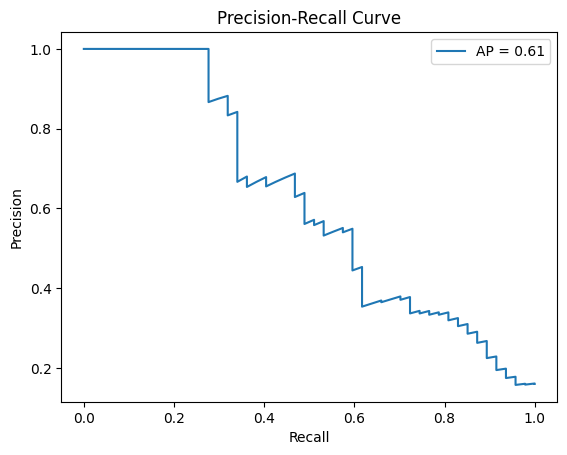

In [285]:
final_lr = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(**lr_clean_params, random_state=42))
    
])

model_metric(final_lr, ['f1','precision', 'recall', 'roc_auc'])

#### Random Forest Classifier

PRECISION : 0.713267125031831 

PRECISION (std) : 0.12317798836455675 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       283
           1       0.11      0.45      0.17        11

    accuracy                           0.84       294
   macro avg       0.54      0.65      0.54       294
weighted avg       0.94      0.84      0.88       294

RECALL : 0.19968971631205673 

RECALL (std) : 0.03295306497273095 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       283
           1       0.11      0.45      0.17        11

    accuracy                           0.84       294
   macro avg       0.54      0.65      0.54       294
weighted avg       0.94      0.84      0.88       294

ROC_AUC : 0.7831115606035034 

ROC_AUC (std) : 0.013316763091021333 

              precision    recall  f1-score   support

           0       0.98      0.85      0.91       283
           1       0.11    

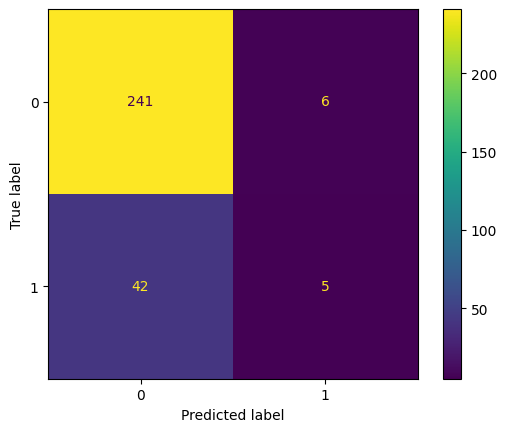

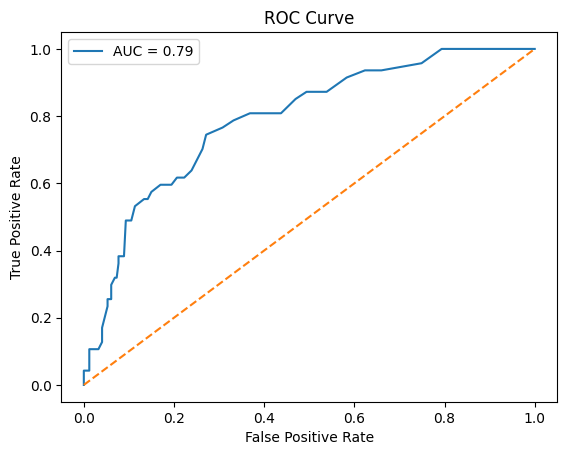

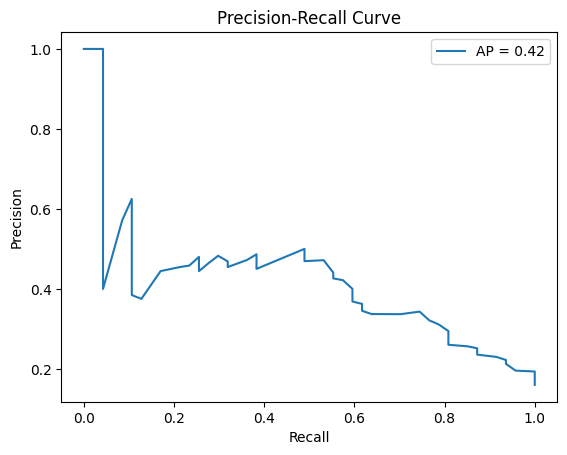

,feature,coefficient
28,Age,0.083494
32,TotalWorkingYears,0.076106
29,DistanceFromHome,0.065136
34,YearsAtCompany,0.047678
30,NumCompaniesWorked,0.046403
37,YearsWithCurrManager,0.045262
31,OverTime,0.043799
27,WorkLifeBalance,0.040282
35,YearsInCurrentRole,0.040073
33,TrainingTimesLastYear,0.038546


In [286]:
Pipe_rf = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('model', RandomForestClassifier(random_state=42))
    
])

model_metric(Pipe_rf, ['precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_rf)

F1 : 0.4166708023159636 

F1 (std) : 0.05774935189560914 

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       276
           1       0.28      0.72      0.40        18

    accuracy                           0.87       294
   macro avg       0.63      0.80      0.66       294
weighted avg       0.94      0.87      0.89       294

PRECISION : 0.7641025641025642 

PRECISION (std) : 0.10340599977252114 

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       280
           1       0.15      0.50      0.23        14

    accuracy                           0.84       294
   macro avg       0.56      0.68      0.57       294
weighted avg       0.93      0.84      0.88       294

RECALL : 0.2994237588652482 

RECALL (std) : 0.06262130788254487 

              precision    recall  f1-score   support

           0       0.98      0.86      0.91       283
           1       0.13      0.55     

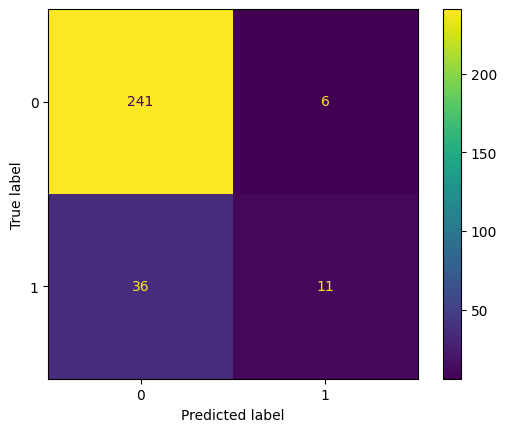

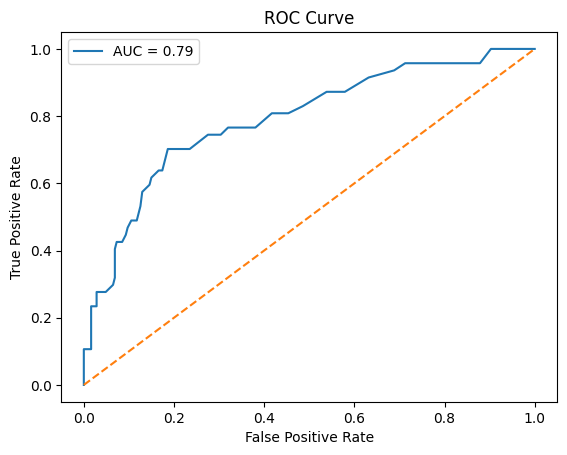

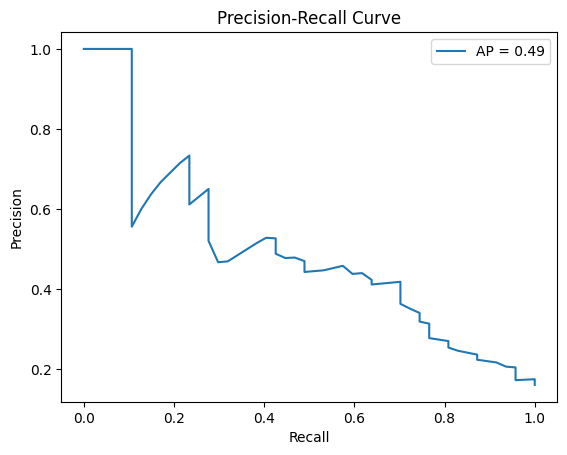

Fitting 4 folds for each of 648 candidates, totalling 2592 fits
Best params: {'model__class_weight': None, 'model__criterion': 'entropy', 'model__max_depth': 20, 'model__min_samples_leaf': 2, 'model__min_samples_split': 5, 'model__n_estimators': 100}
Best F1: 0.4729103448166637
              precision    recall  f1-score   support

           0       0.87      0.97      0.91       247
           1       0.56      0.21      0.31        47

    accuracy                           0.85       294
   macro avg       0.71      0.59      0.61       294
weighted avg       0.82      0.85      0.82       294

Fitting 4 folds for each of 648 candidates, totalling 2592 fits


KeyboardInterrupt: 

In [ ]:
Pipe_rf_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('smote', SMOTE()),
    ('model', RandomForestClassifier(random_state=42))
    
])

param_grid_rf = {
    'model__class_weight' : [None, 'balanced', 'balanced_subsample'],
    'model__n_estimators' : [100, 200, 300],
    'model__max_depth' : [10, 15, 20],
    'model__criterion' : ['gini', 'entropy', 'log_loss'],
    'model__min_samples_split' : [2, 3, 4, 5],
    'model__min_samples_leaf' : [1, 2]
}

grid_rf = GridSearchCV(
    estimator=Pipe_rf_balanced,
    param_grid=param_grid_rf,
    cv=cv,
    scoring=scoring,
    refit='f1_pos',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_rf_balanced, ['f1', 'precision', 'recall', 'roc_auc'])

rf_fit = grid_search(grid_rf)

rf_best_params = grid_rf.best_params_

rf_clean_params = {k.split('__')[1]: v for k, v in rf_best_params.items()}

feature_importance_tree(Pipe_rf_balanced)



F1 : 0.5138113672956606 

F1 (std) : 0.032195401304299494 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       214
           1       0.66      0.39      0.49        80

    accuracy                           0.78       294
   macro avg       0.73      0.66      0.67       294
weighted avg       0.76      0.78      0.76       294

PRECISION : 0.3914891583707463 

PRECISION (std) : 0.04764690053031477 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       219
           1       0.62      0.39      0.48        75

    accuracy                           0.78       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.76      0.78      0.76       294

RECALL : 0.726174645390071 

RECALL (std) : 0.05865852037057822 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       216
           1       0.64      0.38     

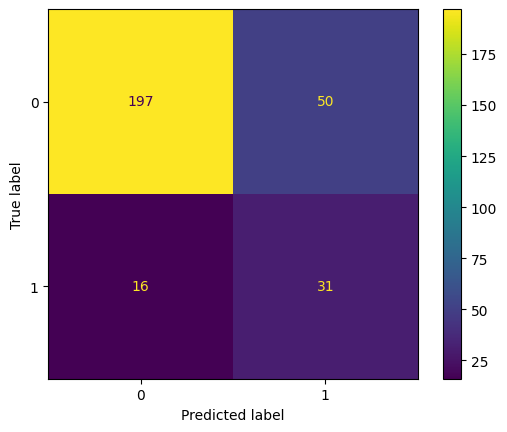

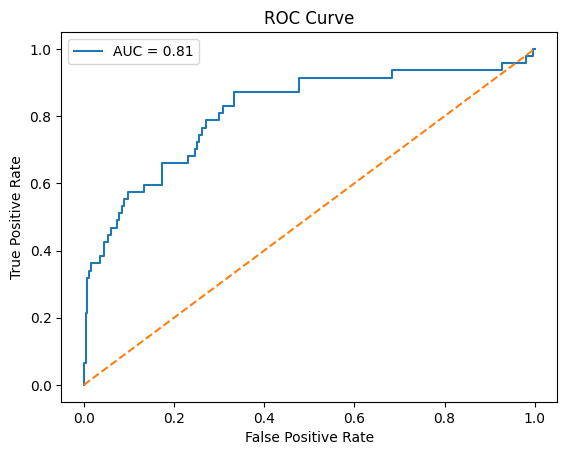

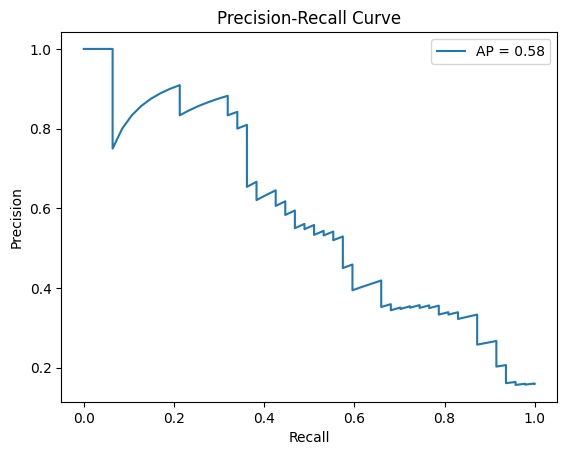

In [ ]:
# Final RandomForestClassifier Model

final_rf = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', RandomForestClassifier(**rf_clean_params, random_state=42))
    
])

model_metric(final_lr, ['f1','precision', 'recall', 'roc_auc'])


#### XGBoost Classifier

F1 : 0.4722651974984713 

F1 (std) : 0.031962929745935634 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.32      0.58      0.41        26

    accuracy                           0.85       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.90      0.85      0.87       294

PRECISION : 0.6666329966329967 

PRECISION (std) : 0.09602870097215885 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.32      0.58      0.41        26

    accuracy                           0.85       294
   macro avg       0.64      0.73      0.66       294
weighted avg       0.90      0.85      0.87       294

RECALL : 0.3683510638297872 

RECALL (std) : 0.022080964750792433 

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       268
           1       0.32      0.58   

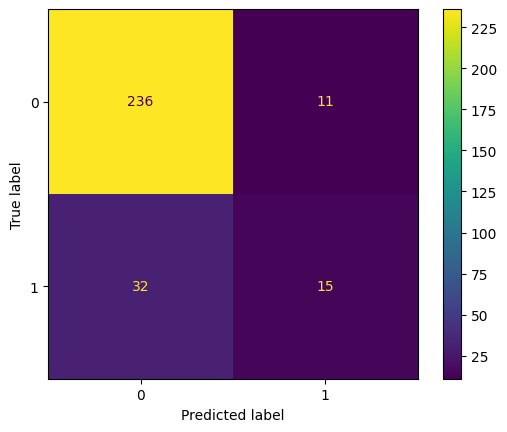

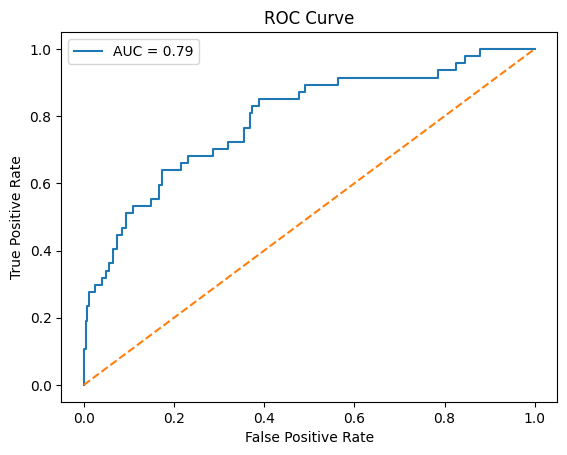

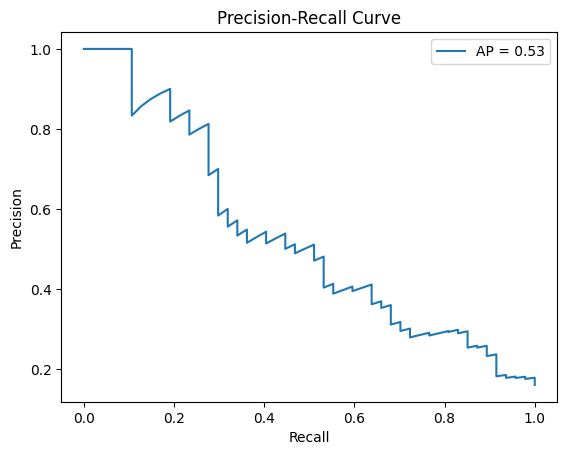

,feature,coefficient
31,OverTime,0.055631
11,JobRole_Manager,0.054906
14,JobRole_Research Scientist,0.050737
15,JobRole_Sales Executive,0.047889
8,JobRole_Healthcare Representative,0.045237
23,JobLevel,0.039076
32,TotalWorkingYears,0.038790
19,MaritalStatus_Single,0.038105
12,JobRole_Manufacturing Director,0.036139
1,BusinessTravel_Travel_Frequently,0.035144


In [ ]:
Pipe_xgbc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(random_state=42))
    
])

model_metric(Pipe_xgbc, ['f1','precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_xgbc)

F1 : 0.5022613000172942 

F1 (std) : 0.055127556112608445 

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       261
           1       0.40      0.58      0.47        33

    accuracy                           0.86       294
   macro avg       0.67      0.73      0.70       294
weighted avg       0.88      0.86      0.87       294

PRECISION : 0.5662188339347243 

PRECISION (std) : 0.07971211041645783 

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       253
           1       0.53      0.61      0.57        41

    accuracy                           0.87       294
   macro avg       0.73      0.76      0.75       294
weighted avg       0.88      0.87      0.87       294

RECALL : 0.45744680851063824 

RECALL (std) : 0.07383479878208911 

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       263
           1       0.34      0.52   

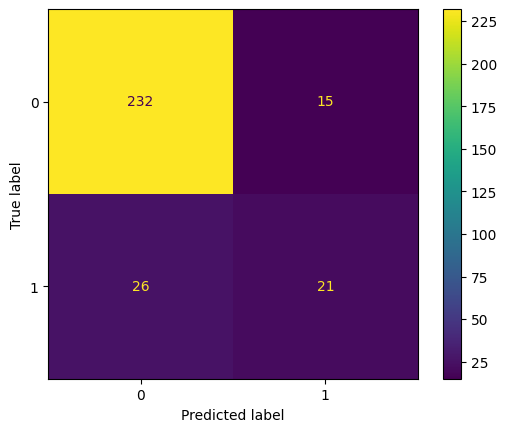

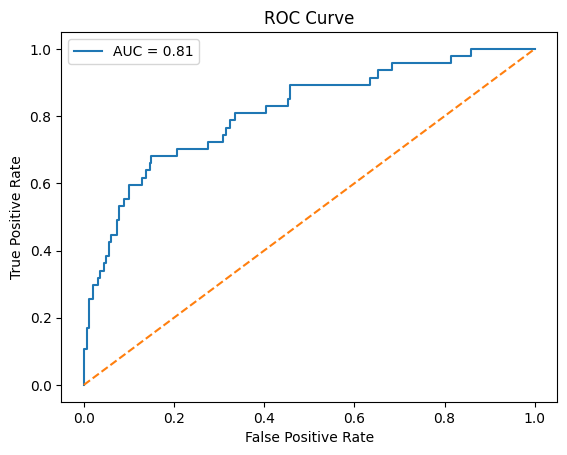

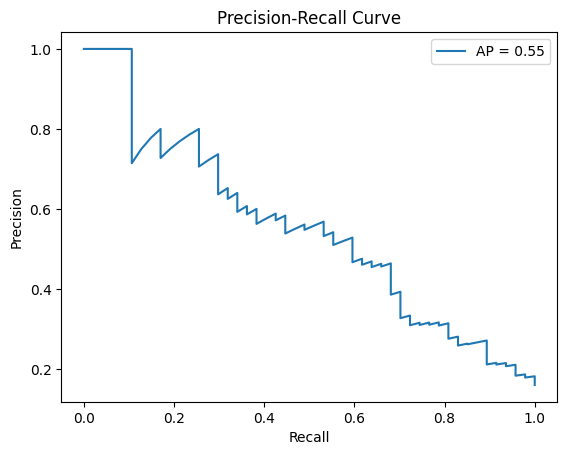

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best params: {'model__eval_metric': 'auc', 'model__gamma': 1, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 300, 'model__subsample': 0.5}
Best F1: 0.5343287957454299
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.54      0.53      0.54        47

    accuracy                           0.85       294
   macro avg       0.73      0.72      0.73       294
weighted avg       0.85      0.85      0.85       294



,feature,coefficient
31,OverTime,0.111495
19,MaritalStatus_Single,0.061906
37,YearsWithCurrManager,0.059971
15,JobRole_Sales Executive,0.058018
0,BusinessTravel_Non-Travel,0.052629
21,EnvironmentSatisfaction,0.040112
23,JobLevel,0.035580
1,BusinessTravel_Travel_Frequently,0.035400
12,JobRole_Manufacturing Director,0.033859
8,JobRole_Healthcare Representative,0.032329


In [289]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()

Pipe_xgbc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight))
    
])

param_grid_xgbc = {
    'model__max_depth' : [10, 15, 20],
    'model__learning_rate' : [0.01,0.1] ,
    'model__n_estimators' : [100, 200, 300],
    'model__eval_metric' : ['logloss', 'auc', 'error'],
    'model__subsample' : [0.5],
    'model__gamma' : [0, 1]
}

grid_xgbc = GridSearchCV(
    estimator=Pipe_xgbc_balanced,
    param_grid=param_grid_xgbc,
    cv=cv,
    scoring=scoring,
    refit='f1_pos',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_xgbc_balanced, ['f1', 'precision', 'recall', 'roc_auc'])

xgbc_fit = grid_search(grid_xgbc)

xgbc_best_params = grid_xgbc.best_params_

xgbc_clean_params = {k.split('__')[1]: v for k, v in xgbc_best_params.items()}

feature_importance_tree(Pipe_xgbc_balanced)



F1 : 0.511845128393278 

F1 (std) : 0.04588865802127429 

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       227
           1       0.60      0.42      0.49        67

    accuracy                           0.80       294
   macro avg       0.72      0.67      0.68       294
weighted avg       0.79      0.80      0.79       294

PRECISION : 0.49196511782718677 

PRECISION (std) : 0.09429412035454604 

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       227
           1       0.64      0.45      0.53        67

    accuracy                           0.82       294
   macro avg       0.74      0.69      0.71       294
weighted avg       0.80      0.82      0.80       294

RECALL : 0.5519725177304965 

RECALL (std) : 0.09602100048123632 

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       233
           1       0.60      0.46     

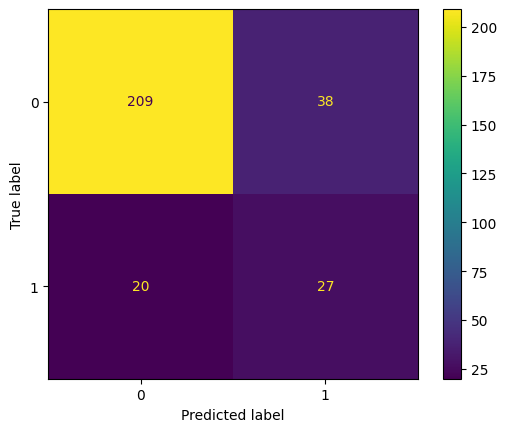

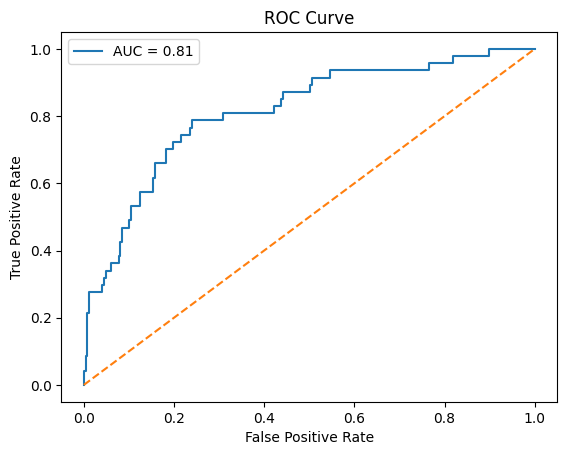

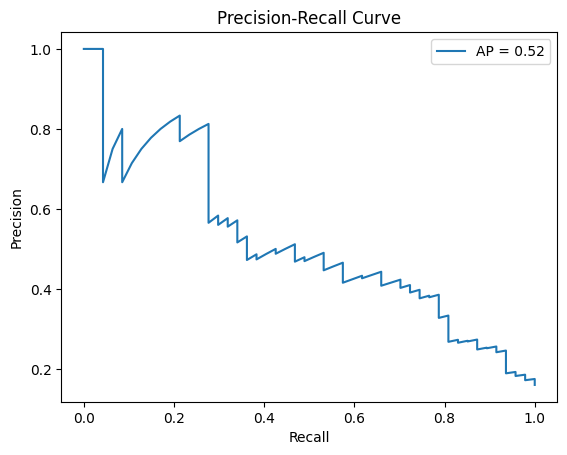

In [ ]:
final_xgbc = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('xgbc', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight,**xgbc_clean_params))
    
])

model_metric(final_xgbc, ['f1','precision', 'recall', 'roc_auc'])

#### LightGBM

F1 : 0.4304807318941237 

F1 (std) : 0.0305530232211281 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       267
           1       0.38      0.67      0.49        27

    accuracy                           0.87       294
   macro avg       0.67      0.78      0.71       294
weighted avg       0.91      0.87      0.89       294

PRECISION : 0.6324448367623761 

PRECISION (std) : 0.0853623371218535 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       267
           1       0.38      0.67      0.49        27

    accuracy                           0.87       294
   macro avg       0.67      0.78      0.71       294
weighted avg       0.91      0.87      0.89       294

RECALL : 0.3312278368794326 

RECALL (std) : 0.04001087844182107 

              precision    recall  f1-score   support

           0       0.96      0.89      0.93       267
           1       0.38      0.67      0

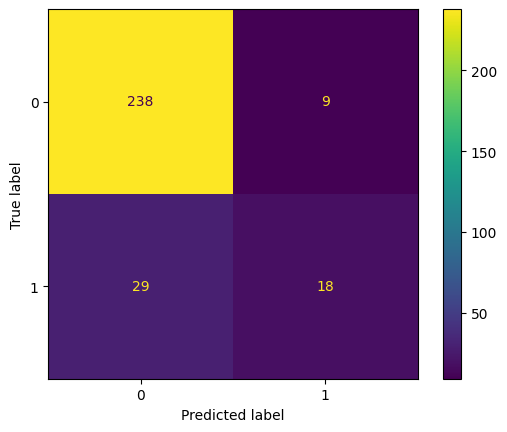

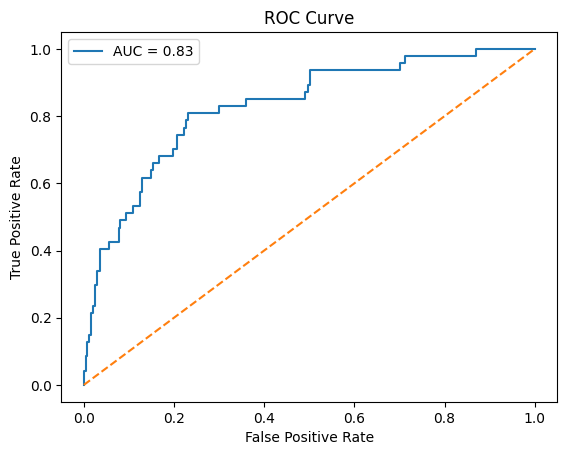

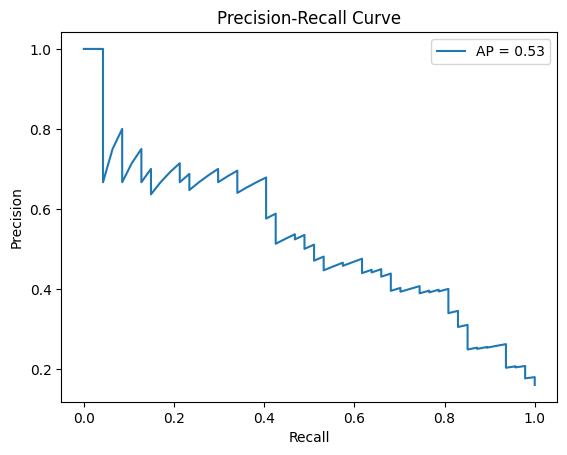

,feature,coefficient
28,Age,317
29,DistanceFromHome,261
38,Loyalty,172
32,TotalWorkingYears,159
30,NumCompaniesWorked,153
26,RelationshipSatisfaction,137
24,JobSatisfaction,130
34,YearsAtCompany,128
37,YearsWithCurrManager,123
35,YearsInCurrentRole,119


In [ ]:
Pipe_lgbm = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('model', LGBMClassifier(random_state=42))
    
])

model_metric(Pipe_lgbm, ['f1','precision', 'recall', 'roc_auc'])

feature_importance_tree(Pipe_lgbm)

F1 : 0.4908722480220158 

F1 (std) : 0.04146465338360078 

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       254
           1       0.47      0.55      0.51        40

    accuracy                           0.85       294
   macro avg       0.70      0.73      0.71       294
weighted avg       0.86      0.85      0.86       294

PRECISION : 0.5849763713262268 

PRECISION (std) : 0.09225072060231461 

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       259
           1       0.45      0.60      0.51        35

    accuracy                           0.86       294
   macro avg       0.70      0.75      0.72       294
weighted avg       0.88      0.86      0.87       294

RECALL : 0.44680851063829785 

RECALL (std) : 0.06485884915232859 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       256
           1       0.43      0.53    

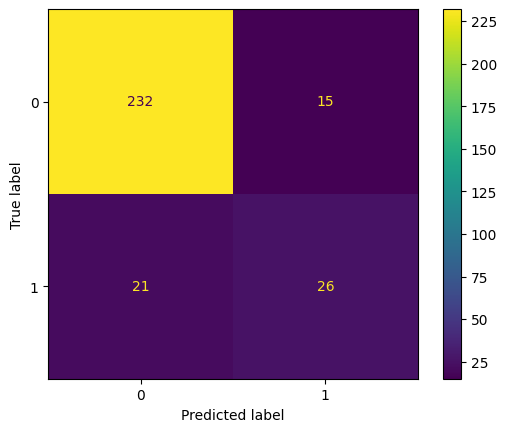

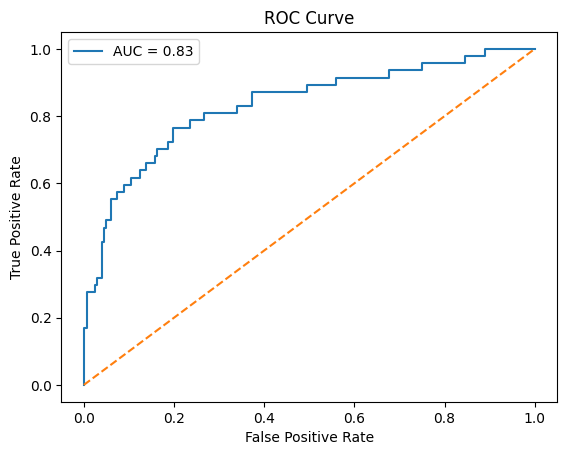

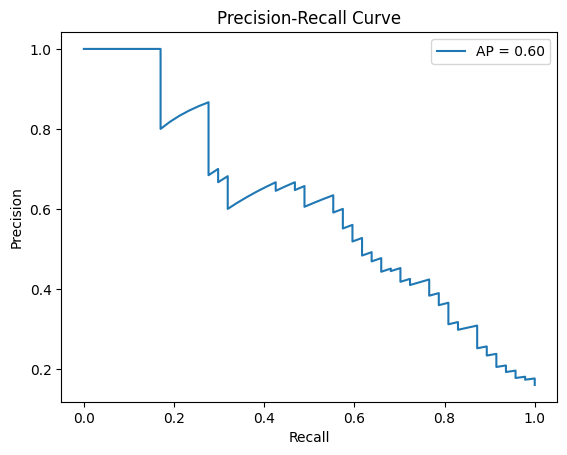

Fitting 4 folds for each of 108 candidates, totalling 432 fits
Best params: {'model__eval_metric': 'auc', 'model__gamma': 1, 'model__learning_rate': 0.1, 'model__max_depth': 10, 'model__n_estimators': 100, 'model__subsample': 0.5}
Best F1: 0.5127029757184396
              precision    recall  f1-score   support

           0       0.89      0.90      0.90       247
           1       0.44      0.43      0.43        47

    accuracy                           0.82       294
   macro avg       0.67      0.66      0.66       294
weighted avg       0.82      0.82      0.82       294



,feature,coefficient
28,Age,231
29,DistanceFromHome,170
21,EnvironmentSatisfaction,158
30,NumCompaniesWorked,156
32,TotalWorkingYears,151
24,JobSatisfaction,144
26,RelationshipSatisfaction,140
38,Loyalty,136
33,TrainingTimesLastYear,135
27,WorkLifeBalance,133


In [ ]:
Pipe_lgbm_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('model', LGBMClassifier(random_state=42,scale_pos_weight=scale_pos_weight))
    
])

param_grid_lgbm = {
    'model__max_depth' : [10, 15, 20],
    'model__learning_rate' : [0.01,0.1] ,
    'model__n_estimators' : [100, 200, 300],
    'model__eval_metric' : ['logloss', 'auc', 'error'],
    'model__subsample' : [0.5],
    'model__gamma' : [0, 1]
}

grid_lgbm = GridSearchCV(
    estimator=Pipe_lgbm_balanced,
    param_grid=param_grid_lgbm,
    cv=cv,
    scoring=scoring,
    refit='f1_pos',
    n_jobs=-1,
    verbose=2,
    error_score= 'raise'
)

model_metric(Pipe_lgbm_balanced, ['f1', 'precision', 'recall', 'roc_auc'])

lgbm_fit = grid_search(grid_lgbm)

lgbm_best_params = grid_lgbm.best_params_

lgbm_clean_params = {k.split('__')[1]: v for k, v in lgbm_best_params.items()}

feature_importance_tree(Pipe_lgbm_balanced)




F1 : 0.4982908600833129 

F1 (std) : 0.03154427603916065 

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       228
           1       0.62      0.44      0.51        66

    accuracy                           0.81       294
   macro avg       0.73      0.68      0.70       294
weighted avg       0.80      0.81      0.80       294

PRECISION : 0.4839460443863898 

PRECISION (std) : 0.04972171090274174 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       231
           1       0.64      0.48      0.55        63

    accuracy                           0.83       294
   macro avg       0.75      0.70      0.72       294
weighted avg       0.82      0.83      0.82       294

RECALL : 0.5678191489361701 

RECALL (std) : 0.07381816505187033 

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       230
           1       0.62      0.45     

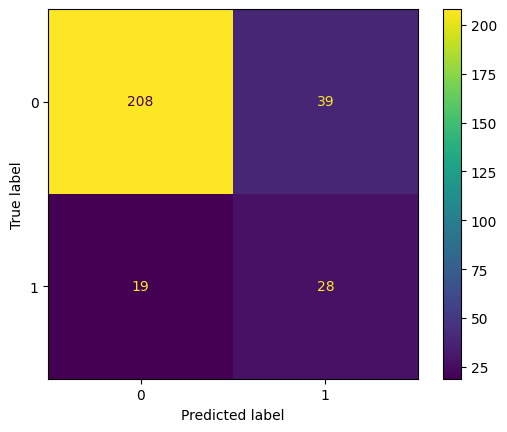

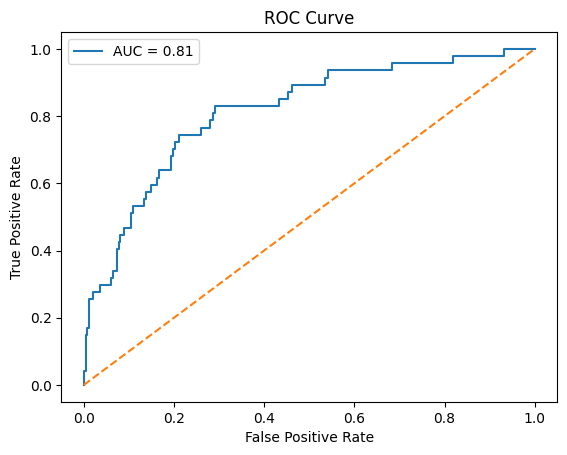

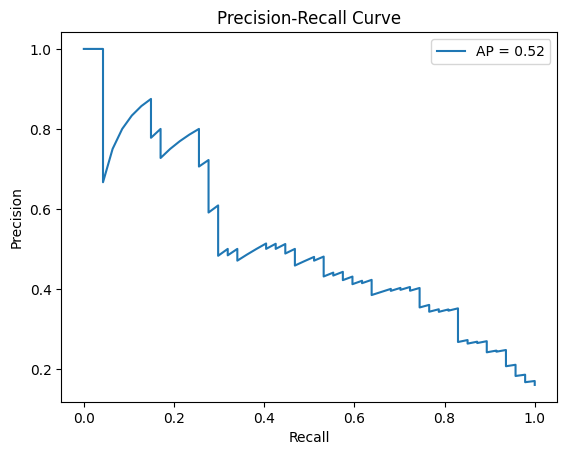

In [ ]:
final_lgbm = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lgbm', XGBClassifier(random_state=42,scale_pos_weight=scale_pos_weight,**xgbc_clean_params))
    
])

model_metric(final_lgbm, ['f1','precision', 'recall', 'roc_auc'])

#### Support Vector Classifier

F1 : 0.520610874486781 

F1 (std) : 0.084706073959986 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       266
           1       0.36      0.61      0.45        28

    accuracy                           0.86       294
   macro avg       0.66      0.75      0.69       294
weighted avg       0.90      0.86      0.88       294

PRECISION : 0.7554826461076461 

PRECISION (std) : 0.12862165686958577 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       266
           1       0.36      0.61      0.45        28

    accuracy                           0.86       294
   macro avg       0.66      0.75      0.69       294
weighted avg       0.90      0.86      0.88       294

RECALL : 0.4095744680851064 

RECALL (std) : 0.10064741338996966 

              precision    recall  f1-score   support

           0       0.96      0.89      0.92       266
           1       0.36      0.61      0.

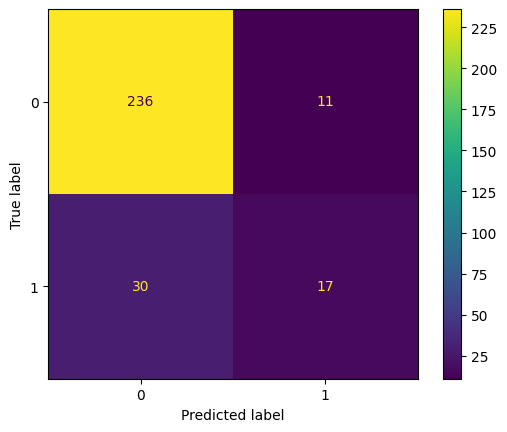

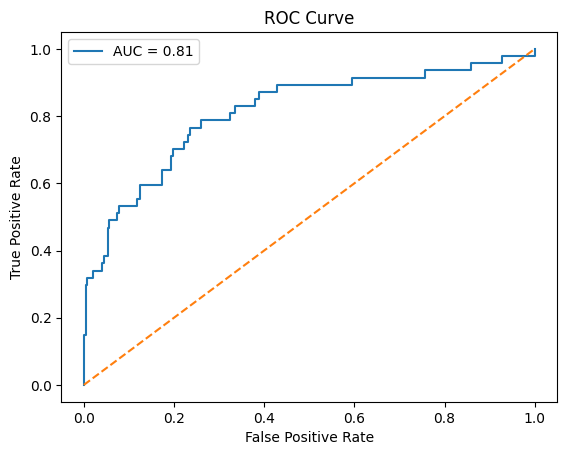

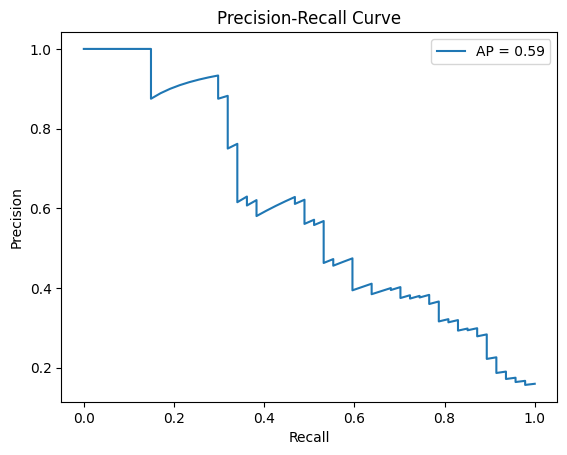

,feature,coefficient
31,OverTime,0.558457
36,YearsSinceLastPromotion,0.452442
30,NumCompaniesWorked,0.356777
21,EnvironmentSatisfaction,-0.353738
35,YearsInCurrentRole,-0.348632
28,Age,-0.335060
13,JobRole_Research Director,-0.319506
24,JobSatisfaction,-0.274133
10,JobRole_Laboratory Technician,0.258311
22,JobInvolvement,-0.257574


In [ ]:
Pipe_svc = Pipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('lr', SVC(random_state=42, probability=True, kernel='linear'))
    
])

model_metric(Pipe_svc, ['f1','precision', 'recall', 'roc_auc'])

feature_importance_linear(Pipe_svc)

F1 : 0.49643416981445154 

F1 (std) : 0.01645437327070944 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       216
           1       0.64      0.38      0.48        78

    accuracy                           0.78       294
   macro avg       0.72      0.65      0.67       294
weighted avg       0.76      0.78      0.76       294

PRECISION : 0.4049417451571268 

PRECISION (std) : 0.04195232745303621 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       212
           1       0.68      0.39      0.50        82

    accuracy                           0.78       294
   macro avg       0.74      0.66      0.68       294
weighted avg       0.77      0.78      0.76       294

RECALL : 0.693927304964539 

RECALL (std) : 0.08371940944762235 

              precision    recall  f1-score   support

           0       0.81      0.92      0.86       217
           1       0.64      0.39     

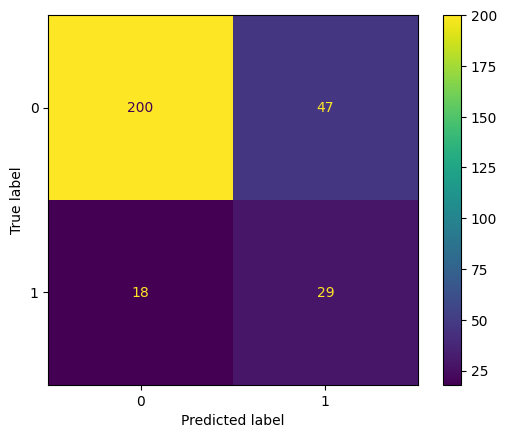

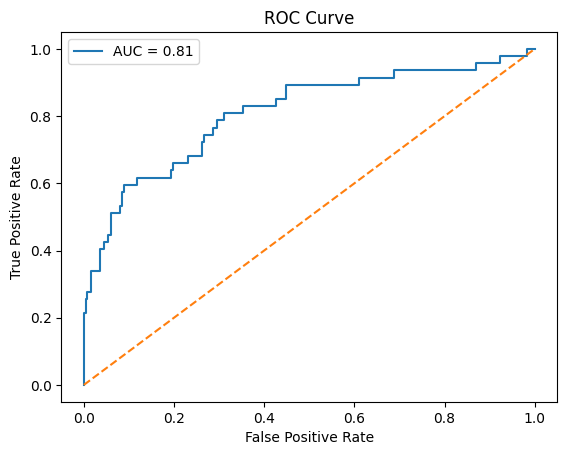

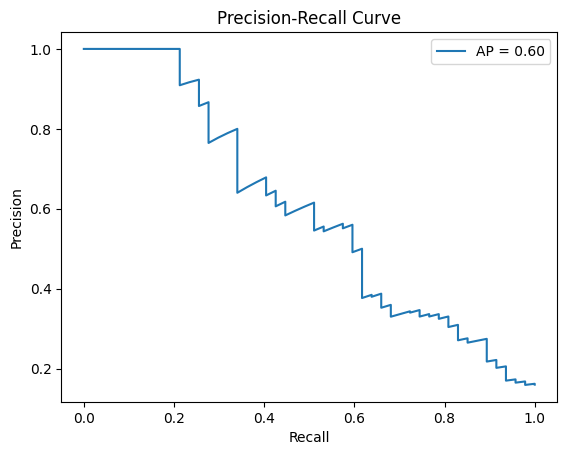

Fitting 4 folds for each of 1080 candidates, totalling 4320 fits
Best params: {'lr__C': 0.1, 'lr__class_weight': 'balanced', 'lr__max_iter': 500, 'lr__penalty': 'l1', 'lr__solver': 'liblinear'}
Best F1: 0.5207513175139075
              precision    recall  f1-score   support

           0       0.93      0.80      0.86       247
           1       0.40      0.68      0.50        47

    accuracy                           0.78       294
   macro avg       0.66      0.74      0.68       294
weighted avg       0.84      0.78      0.80       294



,feature,coefficient
31,OverTime,0.876899
13,JobRole_Research Director,-0.807937
23,JobLevel,0.664777
32,TotalWorkingYears,-0.649793
36,YearsSinceLastPromotion,0.636570
9,JobRole_Human Resources,0.579181
10,JobRole_Laboratory Technician,0.533107
21,EnvironmentSatisfaction,-0.520195
37,YearsWithCurrManager,-0.505531
30,NumCompaniesWorked,0.490747


In [ ]:
Pipe_svc_balanced = ImbPipeline([
    
    ('Preprocessors', preprocessors),
    ('scaler', StandardScaler()),
    ('smote', SMOTE()),
    ('lr', LogisticRegression(random_state=42))
    
])

param_grid_svc = {
    'lr__C': [0.001, 0.01, 0.1, 1, 10],
    'lr__penalty': ['l1', 'l2', 'elasticnet'],
    'lr__class_weight': [None, 'balanced'],
    'lr__solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] ,
    'lr__max_iter' : [100, 200, 300, 400, 500, 600],
    'lr__gamma' : [1]
}

scoring = {
    'f1_pos': make_scorer(f1_score, pos_label=1),
    'recall_pos': make_scorer(recall_score, pos_label=1)
}

grid_svc = GridSearchCV(
    estimator=Pipe_svc_balanced,
    param_grid=param_grid_svc,
    cv=cv,
    scoring=scoring,
    refit='f1_pos',
    n_jobs=-1,
    verbose=2
)

model_metric(Pipe_svc_balanced, ['f1','precision', 'recall', 'roc_auc'])

svc_fit = grid_search(grid_svc)

svc_best_params = grid_svc.best_params_

svc_clean_params = {k.split('__')[1]: v for k, v in svc_best_params.items()}

feature_importance_linear(Pipe_svc_balanced)

In [ ]:
# Feature overlap 
top_n = 20

models = {'lr': lr_fit[0], 'rf': rf_fit[0], 'xgbc': xgbc_fit[0], 'lgbm': lgbm_fit[0], 'svc' : svc_fit[0]}
importance_dict = {}
top_features = {}

for name, model in models.items():
    # Use permutation importance (model-agnostic)
    r = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)
    imp = pd.Series(r.importances_mean, index=x_test.columns)
    top_features[name] = imp.sort_values(ascending=False).head(top_n).index.tolist()
    importance_dict[name] = imp

In [ ]:
imp

Age                        -0.033377
BusinessTravel              0.014889
Department                  0.006839
DistanceFromHome           -0.012415
Education                  -0.007005
EnvironmentSatisfaction    -0.014680
Gender                     -0.007805
JobInvolvement             -0.000787
JobLevel                   -0.018049
JobRole                     0.003839
JobSatisfaction             0.009099
MaritalStatus               0.043807
NumCompaniesWorked          0.010100
OverTime                    0.104398
PerformanceRating           0.000762
RelationshipSatisfaction   -0.017615
TotalWorkingYears          -0.015774
TrainingTimesLastYear       0.002934
WorkLifeBalance            -0.010947
YearsAtCompany              0.000000
YearsInCurrentRole          0.010601
YearsSinceLastPromotion     0.019029
YearsWithCurrManager       -0.005202
Loyalty                    -0.021290
dtype: float64

In [ ]:
results_lr = pd.DataFrame(grid_lr.cv_results_)

results_lr.sort_values(by='mean_test_f1_pos', ascending=False).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lr__C,param_lr__class_weight,param_lr__max_iter,param_lr__penalty,param_lr__solver,params,split0_test_f1_pos,split1_test_f1_pos,split2_test_f1_pos,split3_test_f1_pos,mean_test_f1_pos,std_test_f1_pos,rank_test_f1_pos,split0_test_recall_pos,split1_test_recall_pos,split2_test_recall_pos,split3_test_recall_pos,mean_test_recall_pos,std_test_recall_pos,rank_test_recall_pos
0,0.121163,0.042760,0.076081,0.059761,0.01,balanced,400,l2,sag,"{'lr__C': 0.01, 'lr__class_weight': 'balanced'...",0.547009,0.525547,0.521739,0.475000,0.517324,0.026266,1,0.680851,0.765957,0.750000,0.791667,0.747119,0.041046,43
1,0.081280,0.030279,0.035181,0.013165,0.01,None,100,l2,sag,"{'lr__C': 0.01, 'lr__class_weight': None, 'lr_...",0.573913,0.521739,0.503497,0.465409,0.516139,0.039060,2,0.702128,0.765957,0.750000,0.770833,0.747230,0.027156,37
2,0.063393,0.006956,0.045616,0.017548,0.01,None,100,l2,newton-cholesky,"{'lr__C': 0.01, 'lr__class_weight': None, 'lr_...",0.558559,0.532374,0.514286,0.458599,0.515954,0.036665,3,0.659574,0.787234,0.750000,0.750000,0.736702,0.047053,65
3,0.063530,0.014329,0.038922,0.005113,0.01,balanced,500,l2,lbfgs,"{'lr__C': 0.01, 'lr__class_weight': 'balanced'...",0.543860,0.521127,0.525547,0.470588,0.515281,0.027174,4,0.659574,0.787234,0.750000,0.750000,0.736702,0.047053,65
4,0.134906,0.009172,0.072692,0.022753,0.10,balanced,100,l2,newton-cg,"{'lr__C': 0.1, 'lr__class_weight': 'balanced',...",0.491228,0.548387,0.503597,0.517007,0.515055,0.021295,5,0.595745,0.723404,0.729167,0.791667,0.709996,0.071188,202


In [ ]:
results_rf = pd.DataFrame(grid_rf.cv_results_)

results_rf.sort_values(by='mean_test_f1_pos', ascending=False).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__class_weight,param_model__criterion,param_model__max_depth,param_model__min_samples_leaf,param_model__min_samples_split,param_model__n_estimators,params,split0_test_f1_pos,split1_test_f1_pos,split2_test_f1_pos,split3_test_f1_pos,mean_test_f1_pos,std_test_f1_pos,rank_test_f1_pos,split0_test_recall_pos,split1_test_recall_pos,split2_test_recall_pos,split3_test_recall_pos,mean_test_recall_pos,std_test_recall_pos,rank_test_recall_pos
0,0.886269,0.128425,0.056346,0.017875,balanced,gini,20,2,2,100,"{'model__class_weight': 'balanced', 'model__cr...",0.476190,0.360656,0.492754,0.567901,0.474375,0.074196,1,0.319149,0.234043,0.354167,0.479167,0.346631,0.088111,1
1,1.043369,0.129847,0.055323,0.012793,balanced,gini,15,1,4,100,"{'model__class_weight': 'balanced', 'model__cr...",0.476190,0.393443,0.515152,0.506667,0.472863,0.048088,2,0.319149,0.255319,0.354167,0.395833,0.331117,0.051498,13
2,0.832171,0.078215,0.042334,0.005503,balanced,log_loss,15,2,2,100,"{'model__class_weight': 'balanced', 'model__cr...",0.507937,0.393443,0.477612,0.500000,0.469748,0.045436,3,0.340426,0.255319,0.333333,0.395833,0.331228,0.050063,12
3,1.095280,0.239277,0.040129,0.004462,balanced,entropy,20,1,2,100,"{'model__class_weight': 'balanced', 'model__cr...",0.500000,0.354839,0.500000,0.519481,0.468580,0.066148,4,0.340426,0.234043,0.354167,0.416667,0.336325,0.065673,4
4,0.973482,0.107071,0.054744,0.007676,balanced,gini,20,2,3,100,"{'model__class_weight': 'balanced', 'model__cr...",0.476190,0.363636,0.500000,0.531646,0.467868,0.063312,5,0.319149,0.255319,0.354167,0.437500,0.341534,0.065771,2


In [ ]:
results_xgbc = pd.DataFrame(grid_xgbc.cv_results_)

results_xgbc.sort_values(by='mean_test_f1_pos', ascending=False).reset_index(drop=True).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__eval_metric,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_f1_pos,split1_test_f1_pos,split2_test_f1_pos,split3_test_f1_pos,mean_test_f1_pos,std_test_f1_pos,rank_test_f1_pos,split0_test_recall_pos,split1_test_recall_pos,split2_test_recall_pos,split3_test_recall_pos,mean_test_recall_pos,std_test_recall_pos,rank_test_recall_pos
0,3.452521,0.340159,0.034158,0.003063,logloss,1,0.01,20,300,0.5,"{'model__eval_metric': 'logloss', 'model__gamm...",0.574713,0.468468,0.576923,0.561983,0.545522,0.044851,1,0.531915,0.553191,0.625000,0.708333,0.604610,0.069106,36
1,3.792272,0.189455,0.042657,0.007749,auc,1,0.01,20,300,0.5,"{'model__eval_metric': 'auc', 'model__gamma': ...",0.568182,0.472727,0.549020,0.560000,0.537482,0.037999,2,0.531915,0.553191,0.583333,0.729167,0.599402,0.077115,37
2,4.383189,0.660918,0.045290,0.009629,logloss,1,0.01,15,300,0.5,"{'model__eval_metric': 'logloss', 'model__gamm...",0.565217,0.485437,0.495413,0.564516,0.527646,0.037389,3,0.553191,0.531915,0.562500,0.729167,0.594193,0.078712,38
3,0.985722,0.061810,0.046661,0.017502,auc,1,0.10,10,200,0.5,"{'model__eval_metric': 'auc', 'model__gamma': ...",0.589744,0.500000,0.454545,0.565657,0.527486,0.053406,4,0.489362,0.510638,0.416667,0.583333,0.500000,0.059404,62
4,0.911734,0.094241,0.035412,0.005684,auc,0,0.10,10,100,0.5,"{'model__eval_metric': 'auc', 'model__gamma': ...",0.550000,0.478261,0.500000,0.577320,0.526395,0.039256,5,0.468085,0.468085,0.458333,0.583333,0.494459,0.051466,65


In [ ]:
results_lgbm = pd.DataFrame(grid_lgbm.cv_results_)

results_lgbm.sort_values(by='mean_test_f1_pos', ascending=False).reset_index(drop=True).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__eval_metric,param_model__gamma,param_model__learning_rate,param_model__max_depth,param_model__n_estimators,param_model__subsample,params,split0_test_f1_pos,split1_test_f1_pos,split2_test_f1_pos,split3_test_f1_pos,mean_test_f1_pos,std_test_f1_pos,rank_test_f1_pos,split0_test_recall_pos,split1_test_recall_pos,split2_test_recall_pos,split3_test_recall_pos,mean_test_recall_pos,std_test_recall_pos,rank_test_recall_pos
0,1.192134,0.052899,0.024266,0.002488,auc,1,0.10,10,100,0.5,"{'model__eval_metric': 'auc', 'model__gamma': ...",0.550000,0.461538,0.523810,0.515464,0.512703,0.032171,1,0.468085,0.446809,0.458333,0.520833,0.473515,0.028338,55
1,4.178750,0.580170,0.032230,0.002773,auc,0,0.01,15,300,0.5,"{'model__eval_metric': 'auc', 'model__gamma': ...",0.580000,0.431034,0.482759,0.523810,0.504401,0.054642,2,0.617021,0.531915,0.583333,0.687500,0.604942,0.056484,32
2,2.297016,0.065543,0.024465,0.000845,logloss,1,0.10,15,200,0.5,"{'model__eval_metric': 'logloss', 'model__gamm...",0.527778,0.441558,0.506329,0.539326,0.503748,0.037807,3,0.404255,0.361702,0.416667,0.500000,0.420656,0.050140,73
3,1.963145,0.052386,0.029940,0.004925,logloss,1,0.10,10,100,0.5,"{'model__eval_metric': 'logloss', 'model__gamm...",0.526316,0.447059,0.494118,0.545455,0.503237,0.037263,4,0.425532,0.404255,0.437500,0.562500,0.457447,0.061810,58
4,2.393933,0.183372,0.024963,0.001974,logloss,1,0.10,20,200,0.5,"{'model__eval_metric': 'logloss', 'model__gamm...",0.493151,0.457831,0.519481,0.531915,0.500594,0.028380,5,0.382979,0.404255,0.416667,0.520833,0.431184,0.053143,68


In [ ]:
model_table = pd.Series({
    
})